In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [81]:
df=pd.read_csv('final.csv')
df.head(5)

neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews  reviews_per_month  \
0    149               1                  9               0.21   
1    225               1                 45               0.38   
2    150               3                  0                NaN   
3     89               1                270               4.64   
4     80              10                  9               0.10   

   calculated_host_listings_count  availability_365    year  month   day  \
0                               6               365  2018.0   10.0  19.0   
1                               2               355  2019.0    5.0  21.0   
2                               1               365     NaN    NaN   NaN   
3                               1               194  2019.0    5.0   7.0   
4                               1                 0  2018.0   11.0  19.0   

   week_day  
0       4.0  
1       1.0  
2       NaN  
3       1.0  
4       0.0

In [82]:
from sklearn.impute import SimpleImputer

In [83]:
imputer=SimpleImputer(missing_values=np.nan,strategy='median')

In [84]:
imputer = imputer.fit(df[['reviews_per_month','year','month','day','week_day']])
df[['reviews_per_month','year','month','day','week_day']]=imputer.transform((df[['reviews_per_month','year','month','day','week_day']]))

In [85]:
#categorical variables
categorical=[var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 3 categorical variables


In [86]:
numerical=[var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
df[numerical].head(5)

There are 12 numerical variables


latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
2  40.80902  -73.94190    150               3                  0   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.21                               6               365   
1               0.38                               2               355   
2               0.72                               1               365   
3               4.64                               1               194   
4               0.10                               1                 0   

     year  month   day  week_day  
0  2018.0   10.0  19.0       4.0  
1  2019.0    5.0  21.0       1.0  
2  2019.0    6.0  17.0       3.0  
3  2019.0    5.0   7.0       1.0  
4  2018.0   11.0  19.0       0.0

In [87]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
year                              0
month                             0
day                               0
week_day                          0
dtype: int64

In [88]:
discrete=[var for var in numerical if len(df[var].unique())<20]
print("Discrete Variables Count: {}".format(len(discrete)))
df[discrete].head(5)

Discrete Variables Count: 3


year  month  week_day
0  2018.0   10.0       4.0
1  2019.0    5.0       1.0
2  2019.0    6.0       3.0
3  2019.0    5.0       1.0
4  2018.0   11.0       0.0

In [89]:
continuous=[var for var in numerical if var not in discrete]
print("Continuous feature Count {}".format(len(continuous)))
continuous
df[continuous].head(5)

Continuous feature Count 9


latitude  longitude  price  minimum_nights  number_of_reviews  \
0  40.64749  -73.97237    149               1                  9   
1  40.75362  -73.98377    225               1                 45   
2  40.80902  -73.94190    150               3                  0   
3  40.68514  -73.95976     89               1                270   
4  40.79851  -73.94399     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365   day  
0               0.21                               6               365  19.0  
1               0.38                               2               355  21.0  
2               0.72                               1               365  17.0  
3               4.64                               1               194   7.0  
4               0.10                               1                 0  19.0

In [90]:
def dig_plot(d,var):
    plt.figure(figsize=(16,15))
    
    #hist
    plt.subplot(1,3,1)
    sns.distplot(d[var],bins=30)
    plt.title("Histogram")
    
    #Q-Q plot
    plt.subplot(1,3,2)
    stats.probplot(d[var],dist="norm",plot=plt)
    plt.ylabel("RM Quantiles")
    
    #box plot
    plt.subplot(1,3,3)
    sns.boxplot(y=d[var])
    plt.title("Boxplot")

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


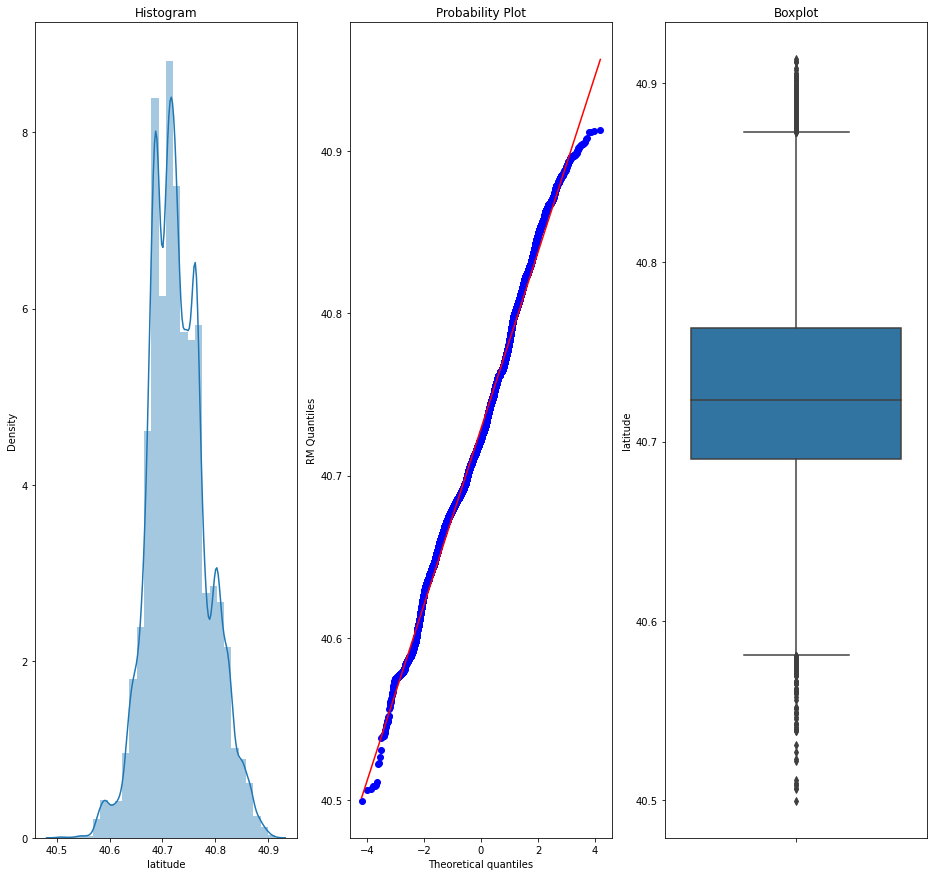

In [91]:
dig_plot(df,'latitude')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


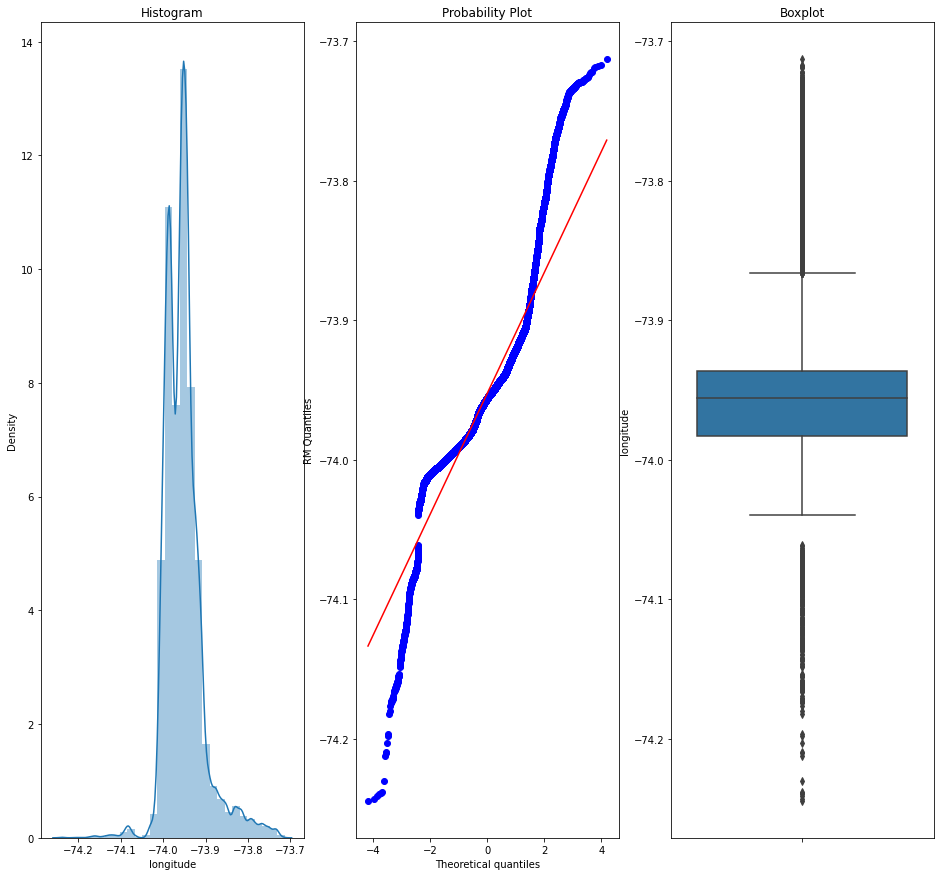

In [92]:
dig_plot(df,'longitude')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


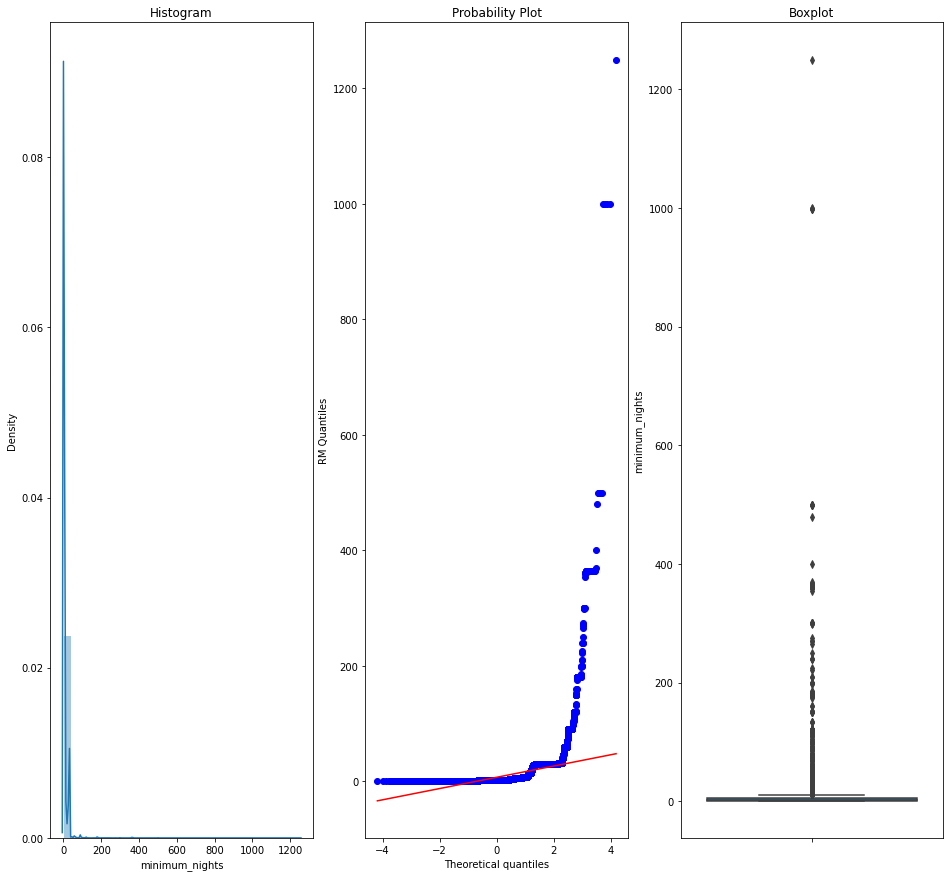

In [93]:
dig_plot(df,'minimum_nights')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


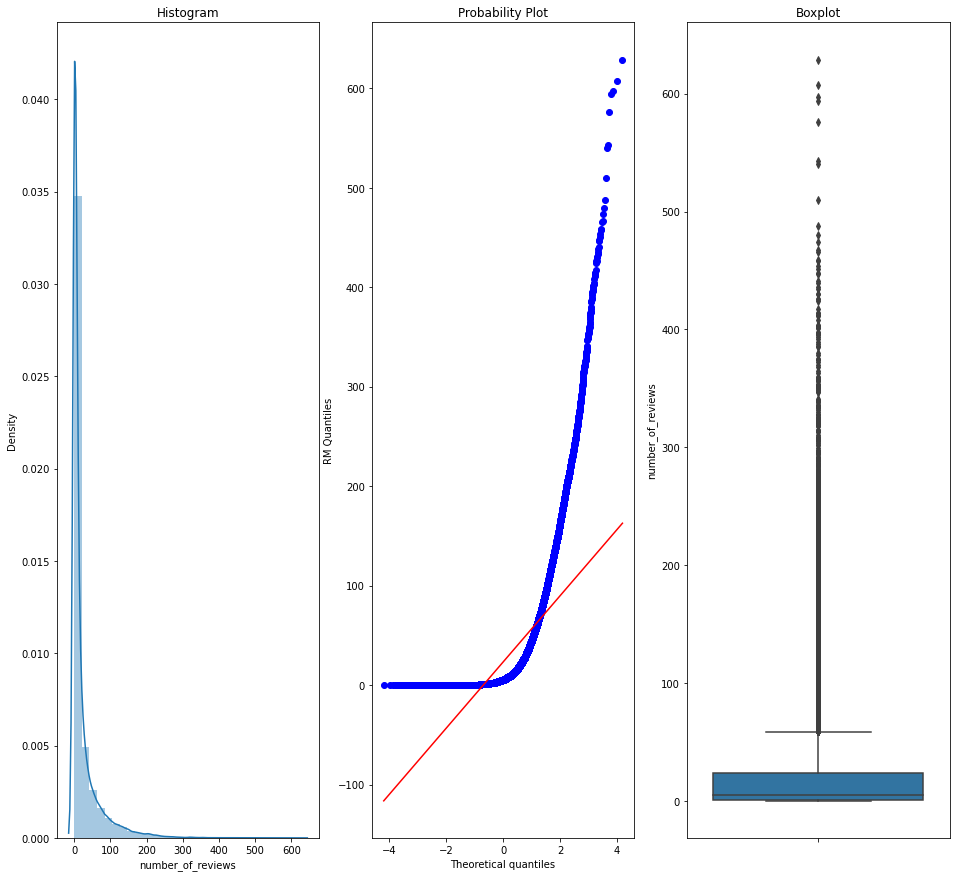

In [94]:
dig_plot(df,'number_of_reviews')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


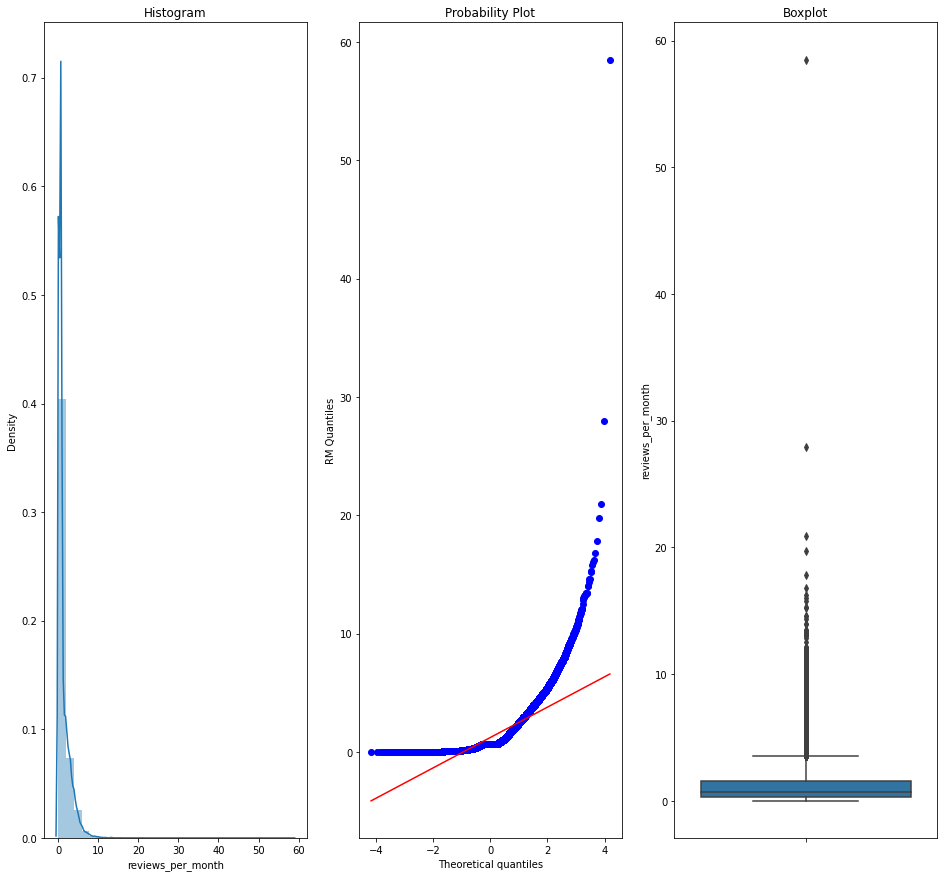

In [95]:
dig_plot(df,'reviews_per_month')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


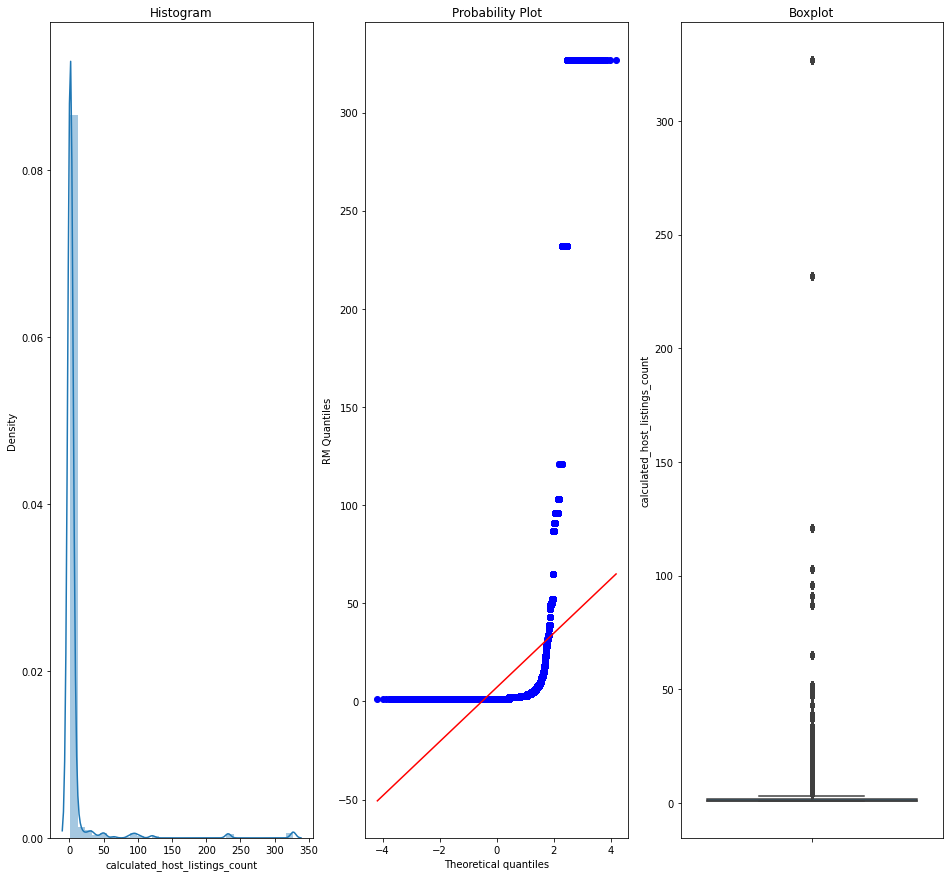

In [96]:
dig_plot(df,'calculated_host_listings_count')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


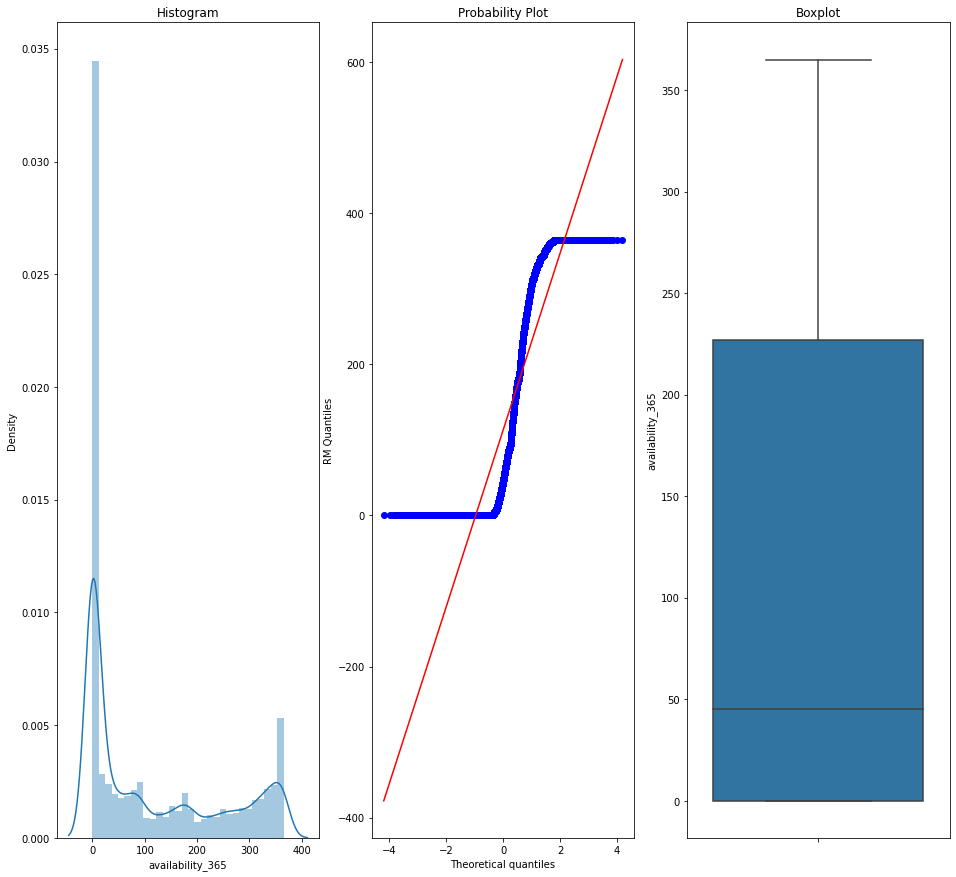

In [97]:
dig_plot(df,'availability_365')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


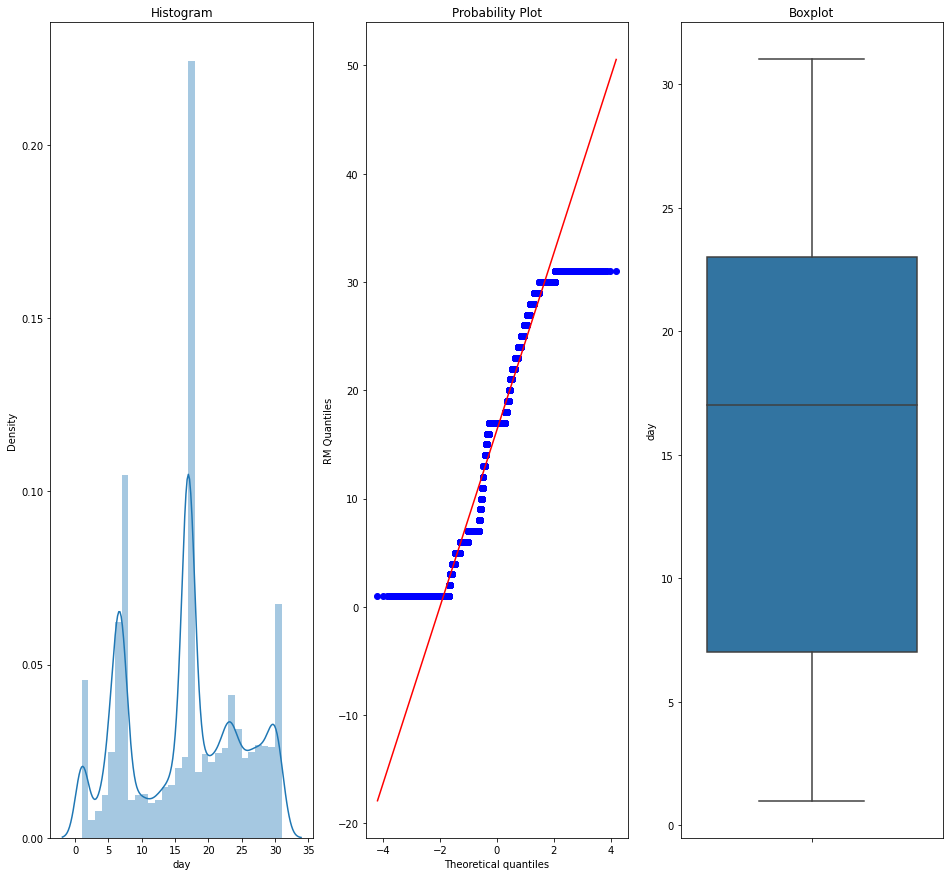

In [98]:
dig_plot(df,'day')

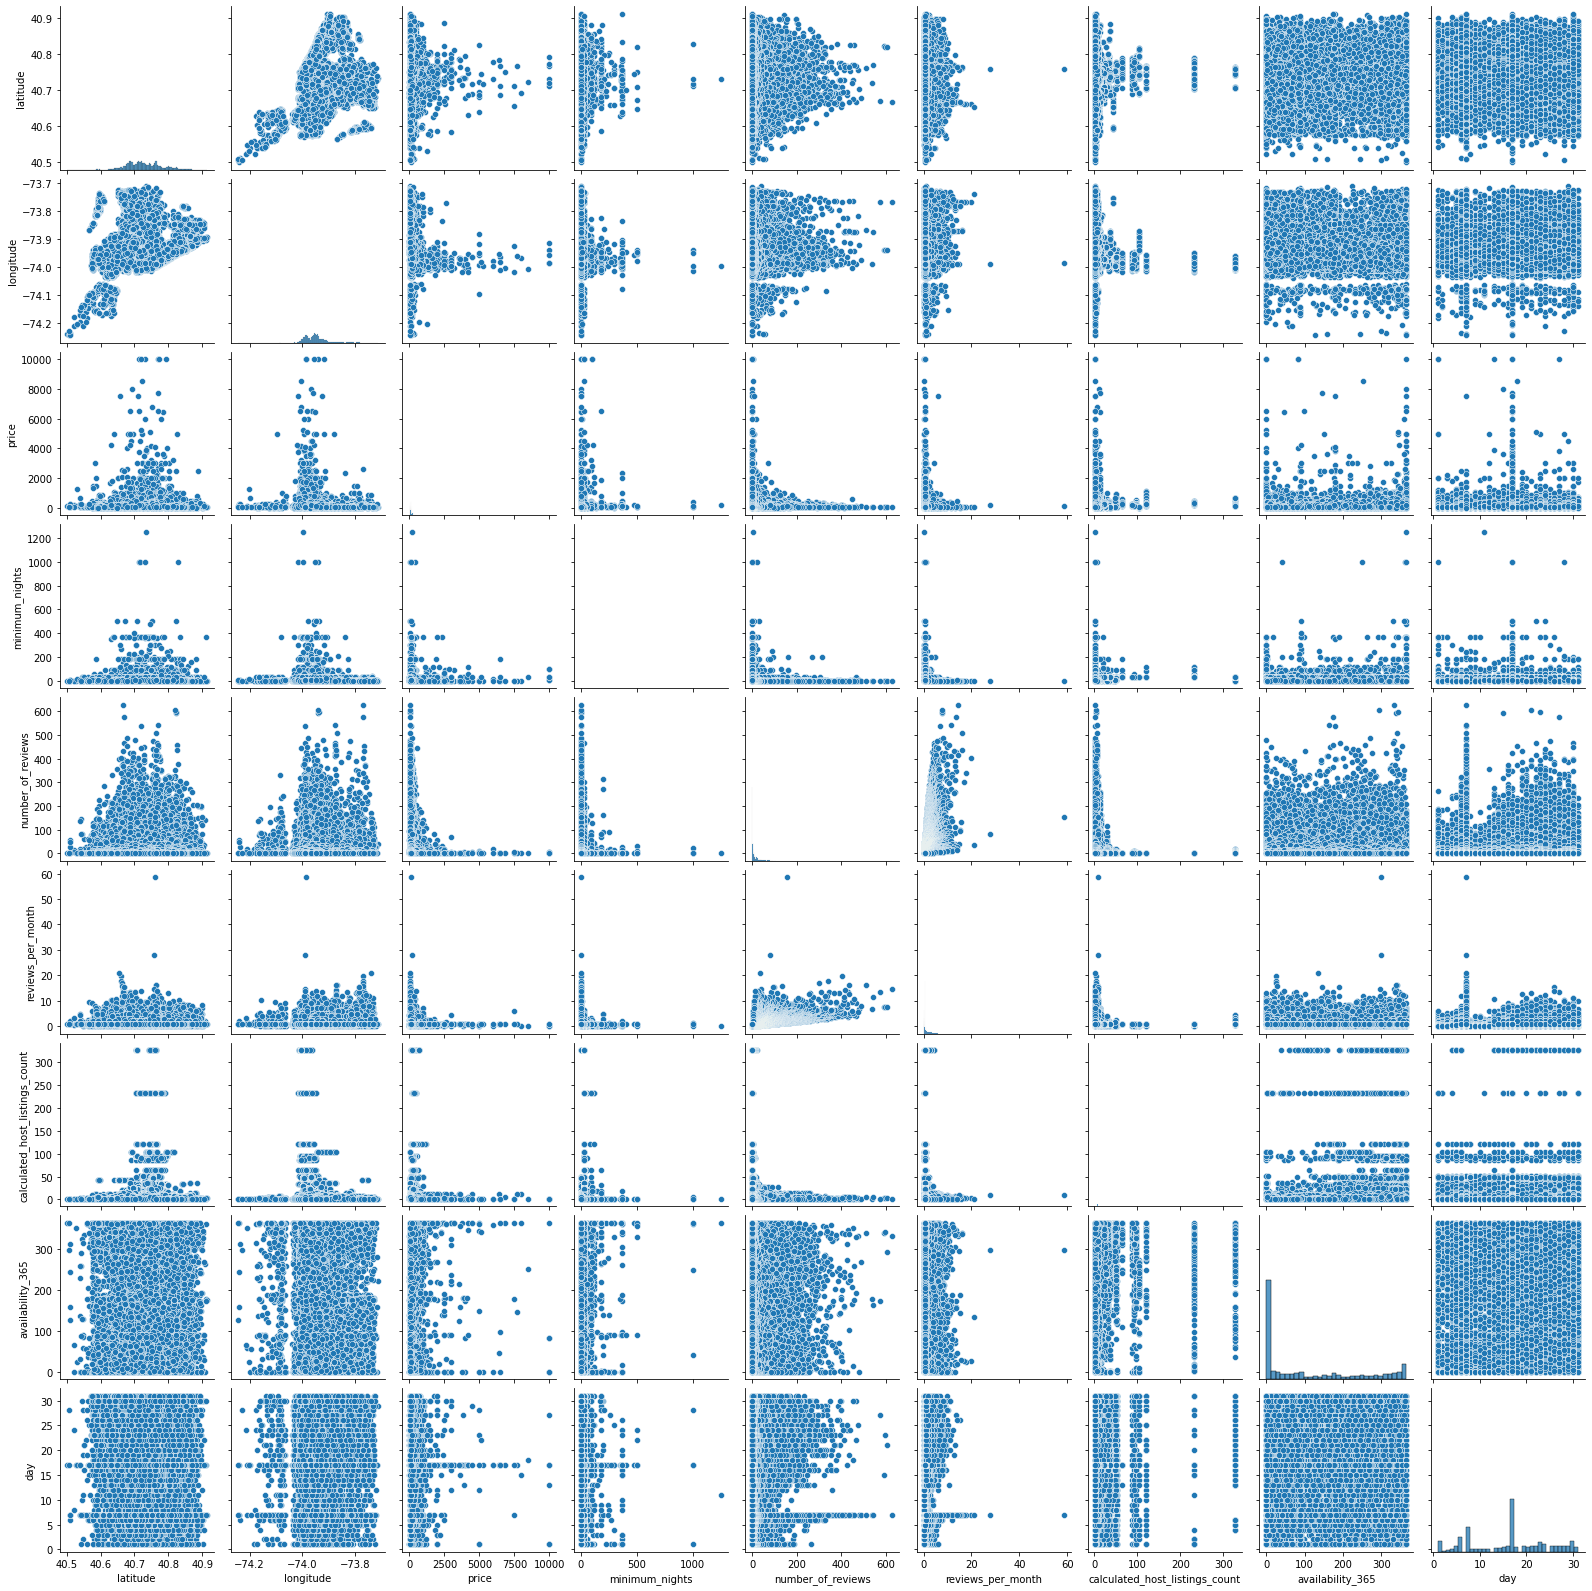

In [99]:
import seaborn as sns
sns.pairplot(df[continuous])

In [100]:
def skewed_bound(d,var,dist):
    IQR=d[var].quantile(0.75)-d[var].quantile(0.25)
    lower_bound=d[var].quantile(0.25) - (IQR * dist)
    upper_bound=d[var].quantile(0.75) + (IQR * dist)
    return lower_bound,upper_bound

In [101]:
df1=df.copy()

In [102]:
lat_upper,lat_lower=skewed_bound(df1,'latitude',1.5)
lat_upper,lat_lower

(40.580577500000004, 40.872637499999996)

In [103]:
lon_upper,lon_lower=skewed_bound(df1,'longitude',1.5)
lon_upper,lon_lower

(-74.0532625, -73.86608249999999)

In [104]:
min_nig_upper,min_nig_lower=skewed_bound(df1,'minimum_nights',1.5)
min_nig_upper,min_nig_lower

(-5.0, 11.0)

In [105]:
no_rev_upper,no_rev_lower=skewed_bound(df1,'number_of_reviews',1.5)
no_rev_upper,no_rev_lower

(-33.5, 58.5)

In [106]:
rev_permon_upper,re_permon_lower=skewed_bound(df1,'reviews_per_month',1.5)
rev_permon_upper,re_permon_lower

(-1.6700000000000002, 3.5300000000000002)

In [107]:
cal_host_upper,cal_host_lower=skewed_bound(df1,'calculated_host_listings_count',1.5)
cal_host_upper,cal_host_lower

(-0.5, 3.5)

In [108]:
avail_upper,avail_lower=skewed_bound(df1,'availability_365',1.5)
avail_upper,avail_lower

(-340.5, 567.5)

In [109]:
year_upper,year_lower=skewed_bound(df1,'day',1.5)
year_upper,year_lower

(-17.0, 47.0)

In [110]:
df1.corr()

latitude  longitude     price  minimum_nights  \
latitude                        1.000000   0.084788  0.033939        0.024869   
longitude                       0.084788   1.000000 -0.150019       -0.062747   
price                           0.033939  -0.150019  1.000000        0.042799   
minimum_nights                  0.024869  -0.062747  0.042799        1.000000   
number_of_reviews              -0.015389   0.059094 -0.047954       -0.080116   
reviews_per_month              -0.014078   0.137153 -0.036814       -0.109876   
calculated_host_listings_count  0.019517  -0.114713  0.057472        0.127960   
availability_365               -0.010983   0.082731  0.081829        0.144303   
year                           -0.010079   0.076946  0.010729       -0.005913   
month                          -0.001155  -0.008835  0.002384        0.011126   
day                             0.001229  -0.012007 -0.001297        0.001975   
week_day                       -0.003140   0.017518 -0.004629       -0.005355   

                                number_of_reviews  reviews_per_month  \
latitude                                -0.015389          -0.014078   
longitude                                0.059094           0.137153   
price                                   -0.047954          -0.036814   
minimum_nights                          -0.080116          -0.109876   
number_of_reviews                        1.000000           0.568177   
reviews_per_month                        0.568177           1.000000   
calculated_host_listings_count          -0.072376          -0.027097   
availability_365                         0.172028           0.165954   
year                                     0.183003           0.356997   
month                                   -0.053492          -0.102948   
day                                      0.027778           0.002130   
week_day                                 0.037155           0.059062   

                                calculated_host_listings_count  \
latitude                                              0.019517   
longitude                                            -0.114713   
price                                                 0.057472   
minimum_nights                                        0.127960   
number_of_reviews                                    -0.072376   
reviews_per_month                                    -0.027097   
calculated_host_listings_count                        1.000000   
availability_365                                      0.225701   
year                                                  0.067567   
month                                                 0.007433   
day                                                   0.009740   
week_day                                             -0.003520   

                                availability_365      year     month  \
latitude                               -0.010983 -0.010079 -0.001155   
longitude                               0.082731  0.076946 -0.008835   
price                                   0.081829  0.010729  0.002384   
minimum_nights                          0.144303 -0.005913  0.011126   
number_of_reviews                       0.172028  0.183003 -0.053492   
reviews_per_month                       0.165954  0.356997 -0.102948   
calculated_host_listings_count          0.225701  0.067567  0.007433   
availability_365                        1.000000  0.256517 -0.047805   
year                                    0.256517  1.000000 -0.228896   
month                                  -0.047805 -0.228896  1.000000   
day                                     0.010170 -0.008705  0.212735   
week_day                                0.032877  0.039239  0.121628   

                                     day  week_day  
latitude                        0.001229 -0.003140  
longitude                      -0.012007  0.017518  
price                          -0.001297 -0.004629  
minimum_nights                  0

In [111]:
df1['latitude']=np.where(df1['latitude']>lat_upper,lat_upper,np.where(df1['latitude']<lat_lower,lat_lower,df1['latitude']))
df1['longitude']=np.where(df1['longitude']>lon_upper,lon_upper,np.where(df1['longitude']<lon_lower,lon_lower,df1['longitude']))
df1['minimum_nights']=np.where(df1['minimum_nights']>min_nig_upper,min_nig_upper,np.where(df1['minimum_nights']<min_nig_lower,min_nig_lower,df1['minimum_nights']))
df1['number_of_reviews']=np.where(df1['number_of_reviews']>no_rev_upper,no_rev_upper,np.where(df1['number_of_reviews']<no_rev_lower,no_rev_lower,df1['number_of_reviews']))
df1['calculated_host_listings_count']=np.where(df1['calculated_host_listings_count']>cal_host_upper,cal_host_upper,np.where(df1['calculated_host_listings_count']<cal_host_lower,cal_host_lower,df1['calculated_host_listings_count']))
df1['availability_365']=np.where(df1['availability_365']>avail_upper,avail_upper,np.where(df1['availability_365']<avail_lower,avail_lower,df1['availability_365']))
df1['day']=np.where(df1['day']>year_upper,year_upper,np.where(df1['day']<year_lower,year_lower,df1['day']))
                                

In [112]:
df1.corr()

latitude  longitude     price  minimum_nights  \
latitude                        1.000000   0.257600 -0.005093             NaN   
longitude                       0.257600   1.000000 -0.013840             NaN   
price                          -0.005093  -0.013840  1.000000             NaN   
minimum_nights                       NaN        NaN       NaN             NaN   
number_of_reviews                    NaN        NaN       NaN             NaN   
reviews_per_month               0.006040   0.026020 -0.036814             NaN   
calculated_host_listings_count       NaN        NaN       NaN             NaN   
availability_365                     NaN        NaN       NaN             NaN   
year                            0.017700   0.030381  0.010729             NaN   
month                          -0.000289  -0.011849  0.002384             NaN   
day                                  NaN        NaN       NaN             NaN   
week_day                        0.007995   0.003106 -0.004629             NaN   

                                number_of_reviews  reviews_per_month  \
latitude                                      NaN           0.006040   
longitude                                     NaN           0.026020   
price                                         NaN          -0.036814   
minimum_nights                                NaN                NaN   
number_of_reviews                             NaN                NaN   
reviews_per_month                             NaN           1.000000   
calculated_host_listings_count                NaN                NaN   
availability_365                              NaN                NaN   
year                                          NaN           0.356997   
month                                         NaN          -0.102948   
day                                           NaN                NaN   
week_day                                      NaN           0.059062   

                                calculated_host_listings_count  \
latitude                                                   NaN   
longitude                                                  NaN   
price                                                      NaN   
minimum_nights                                             NaN   
number_of_reviews                                          NaN   
reviews_per_month                                          NaN   
calculated_host_listings_count                             NaN   
availability_365                                           NaN   
year                                                       NaN   
month                                                      NaN   
day                                                        NaN   
week_day                                                   NaN   

                                availability_365      year     month  day  \
latitude                                     NaN  0.017700 -0.000289  NaN   
longitude                                    NaN  0.030381 -0.011849  NaN   
price                                        NaN  0.010729  0.002384  NaN   
minimum_nights                               NaN       NaN       NaN  NaN   
number_of_reviews                            NaN       NaN       NaN  NaN   
reviews_per_month                            NaN  0.356997 -0.102948  NaN   
calculated_host_listings_count               NaN       NaN       NaN  NaN   
availability_365                             NaN       NaN       NaN  NaN   
year                                         NaN  1.000000 -0.228896  NaN   
month                                        NaN -0.228896  1.000000  NaN   
day                                          NaN       NaN       NaN  NaN   
week_day                                     NaN  0.039239  0.121628  NaN   

                                week_day  
latitude                        0.007995  
longitude                       0.003106  
price                          -0.004629  
minimum_

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


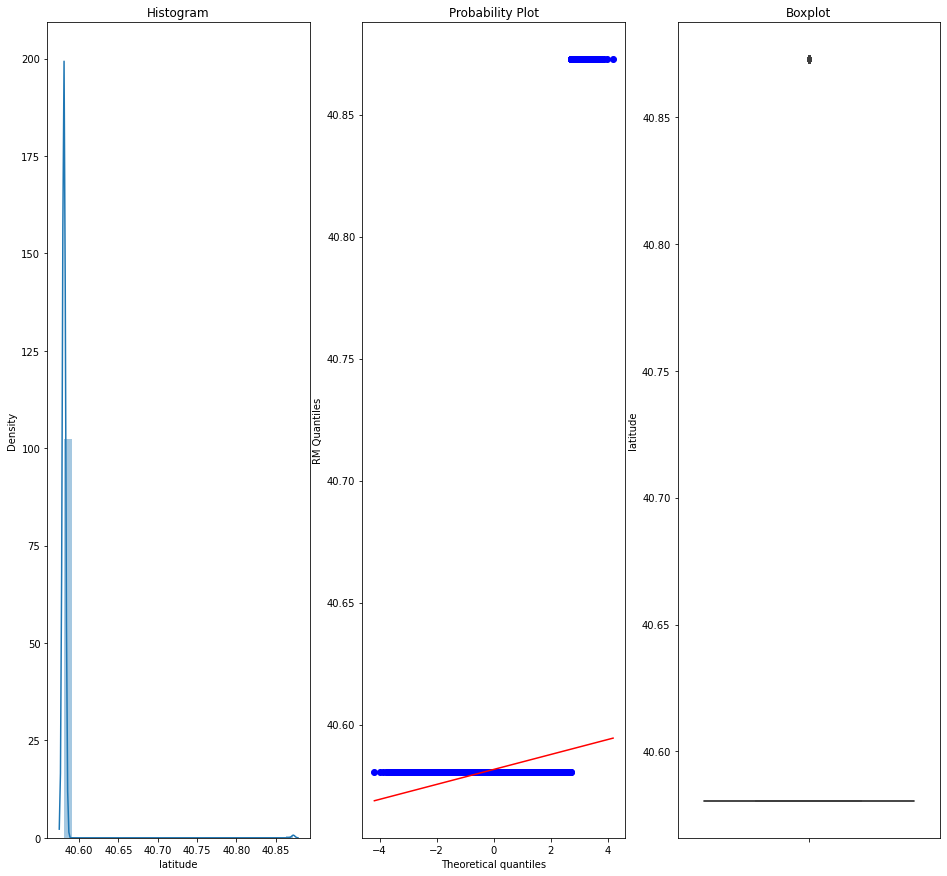

In [113]:
dig_plot(df1,'latitude')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


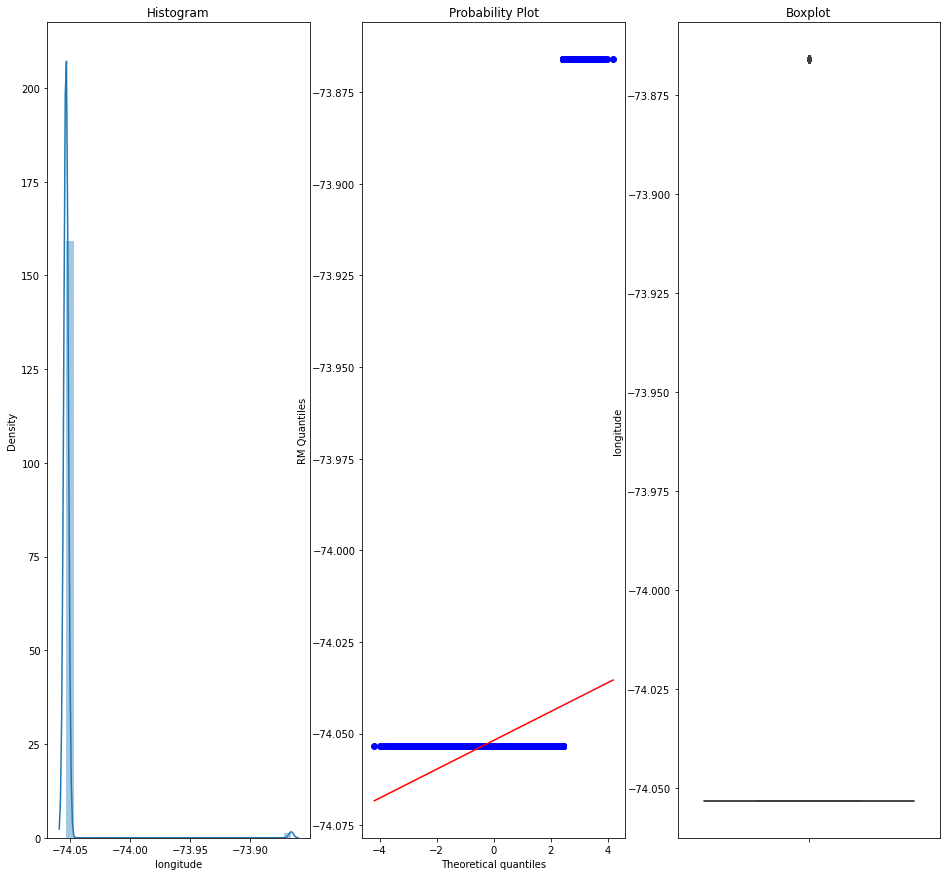

In [114]:
dig_plot(df1,'longitude')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


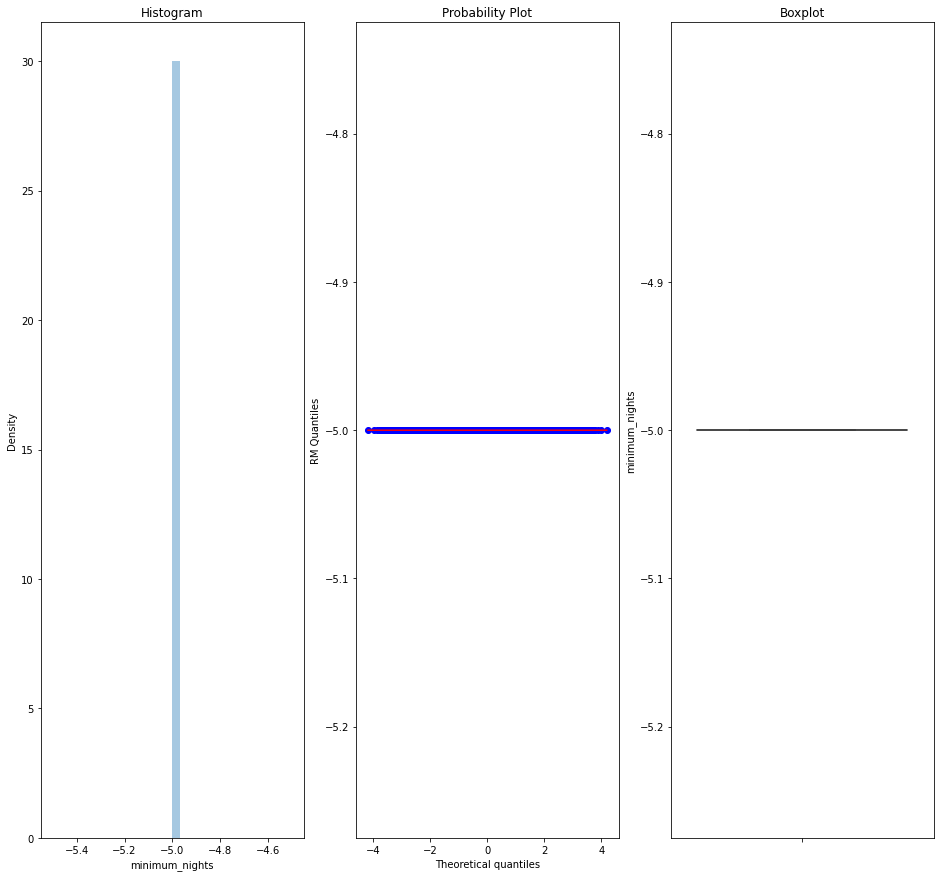

In [115]:
dig_plot(df1,'minimum_nights')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


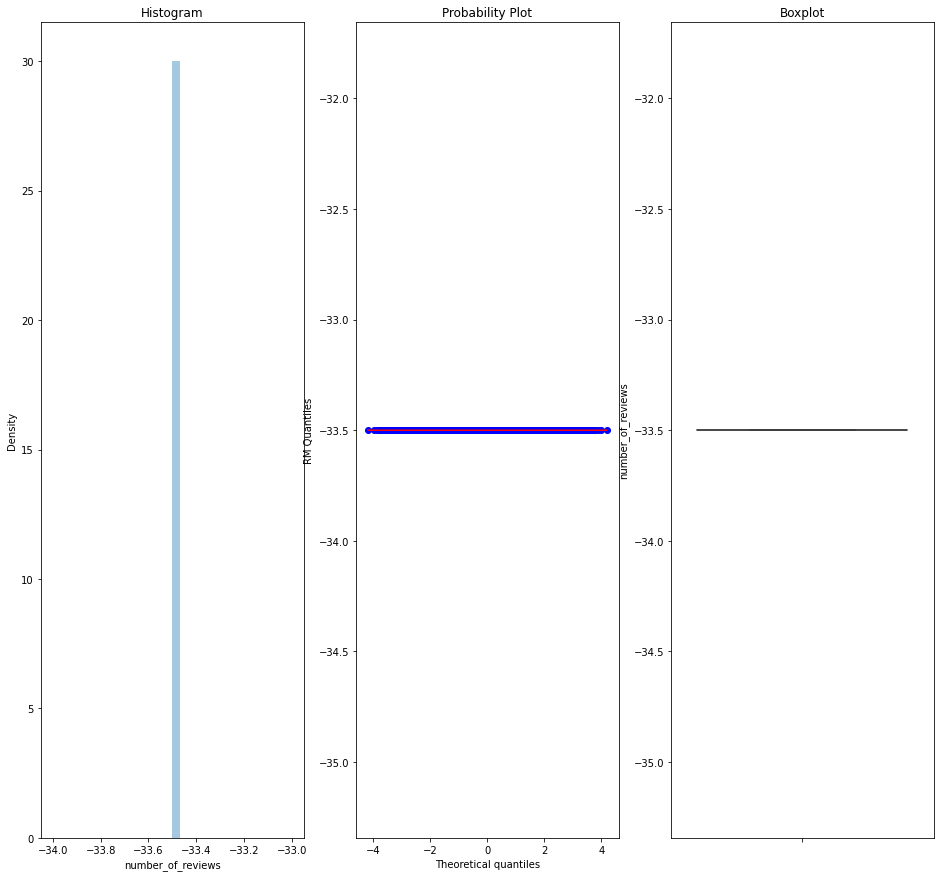

In [116]:
dig_plot(df1,'number_of_reviews')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


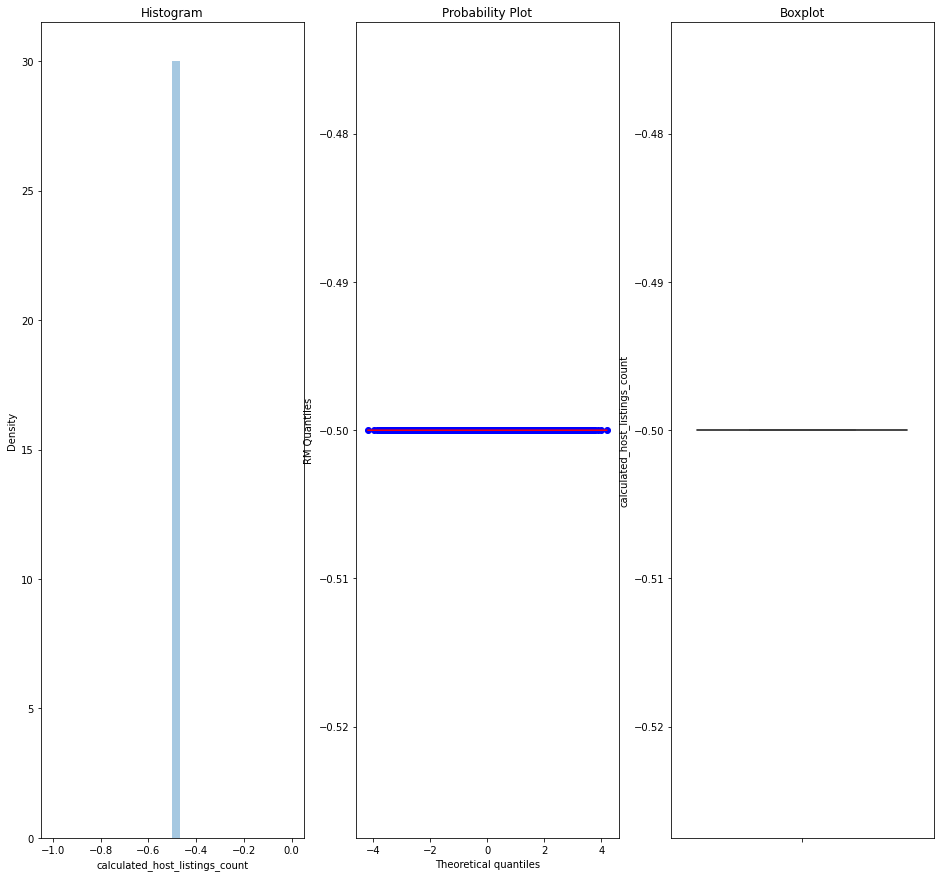

In [117]:
dig_plot(df1,'calculated_host_listings_count')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


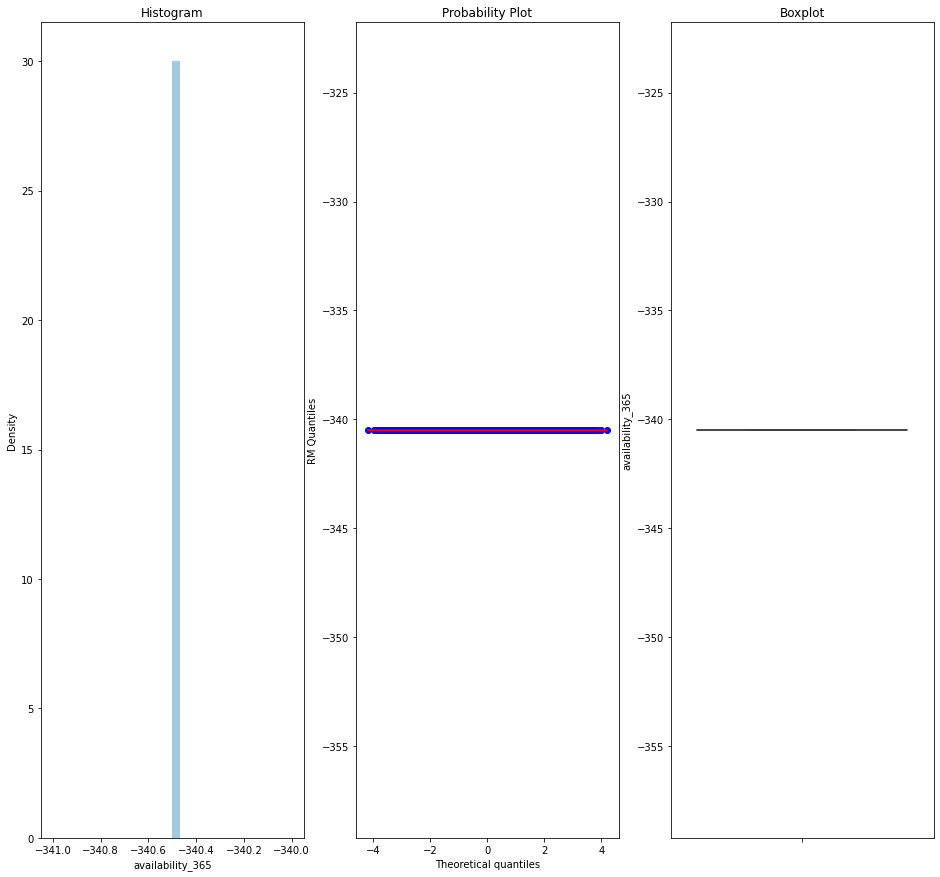

In [118]:
dig_plot(df1,'availability_365')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


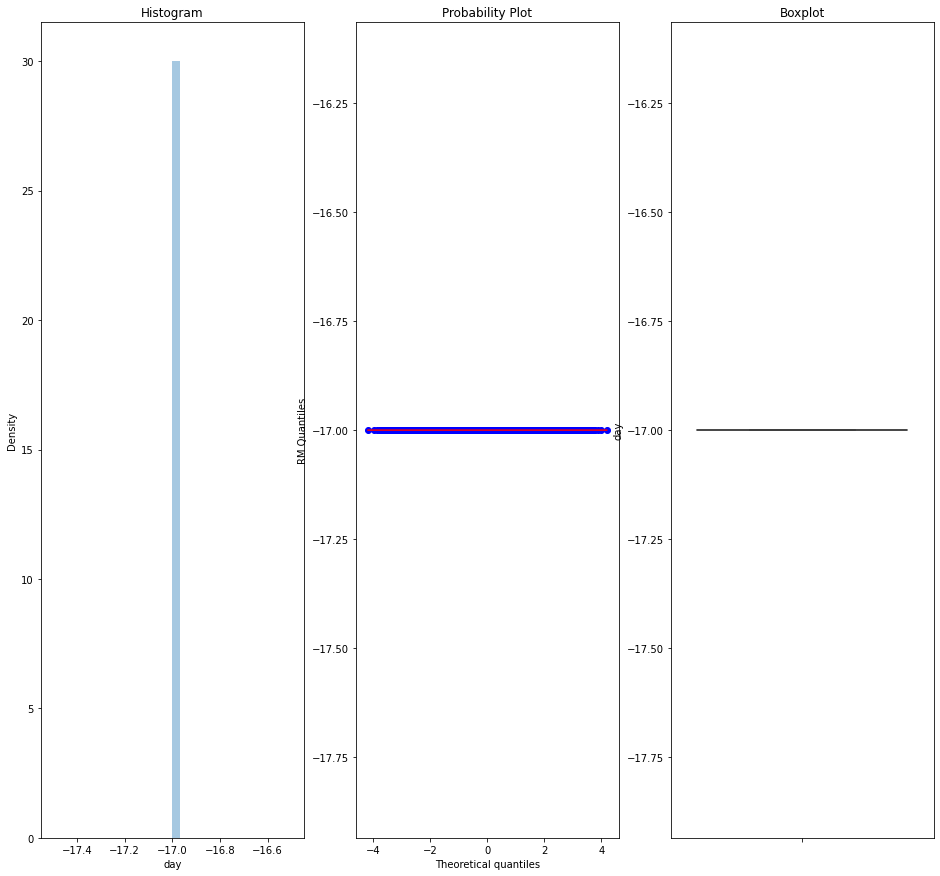

In [119]:
dig_plot(df1,'day')

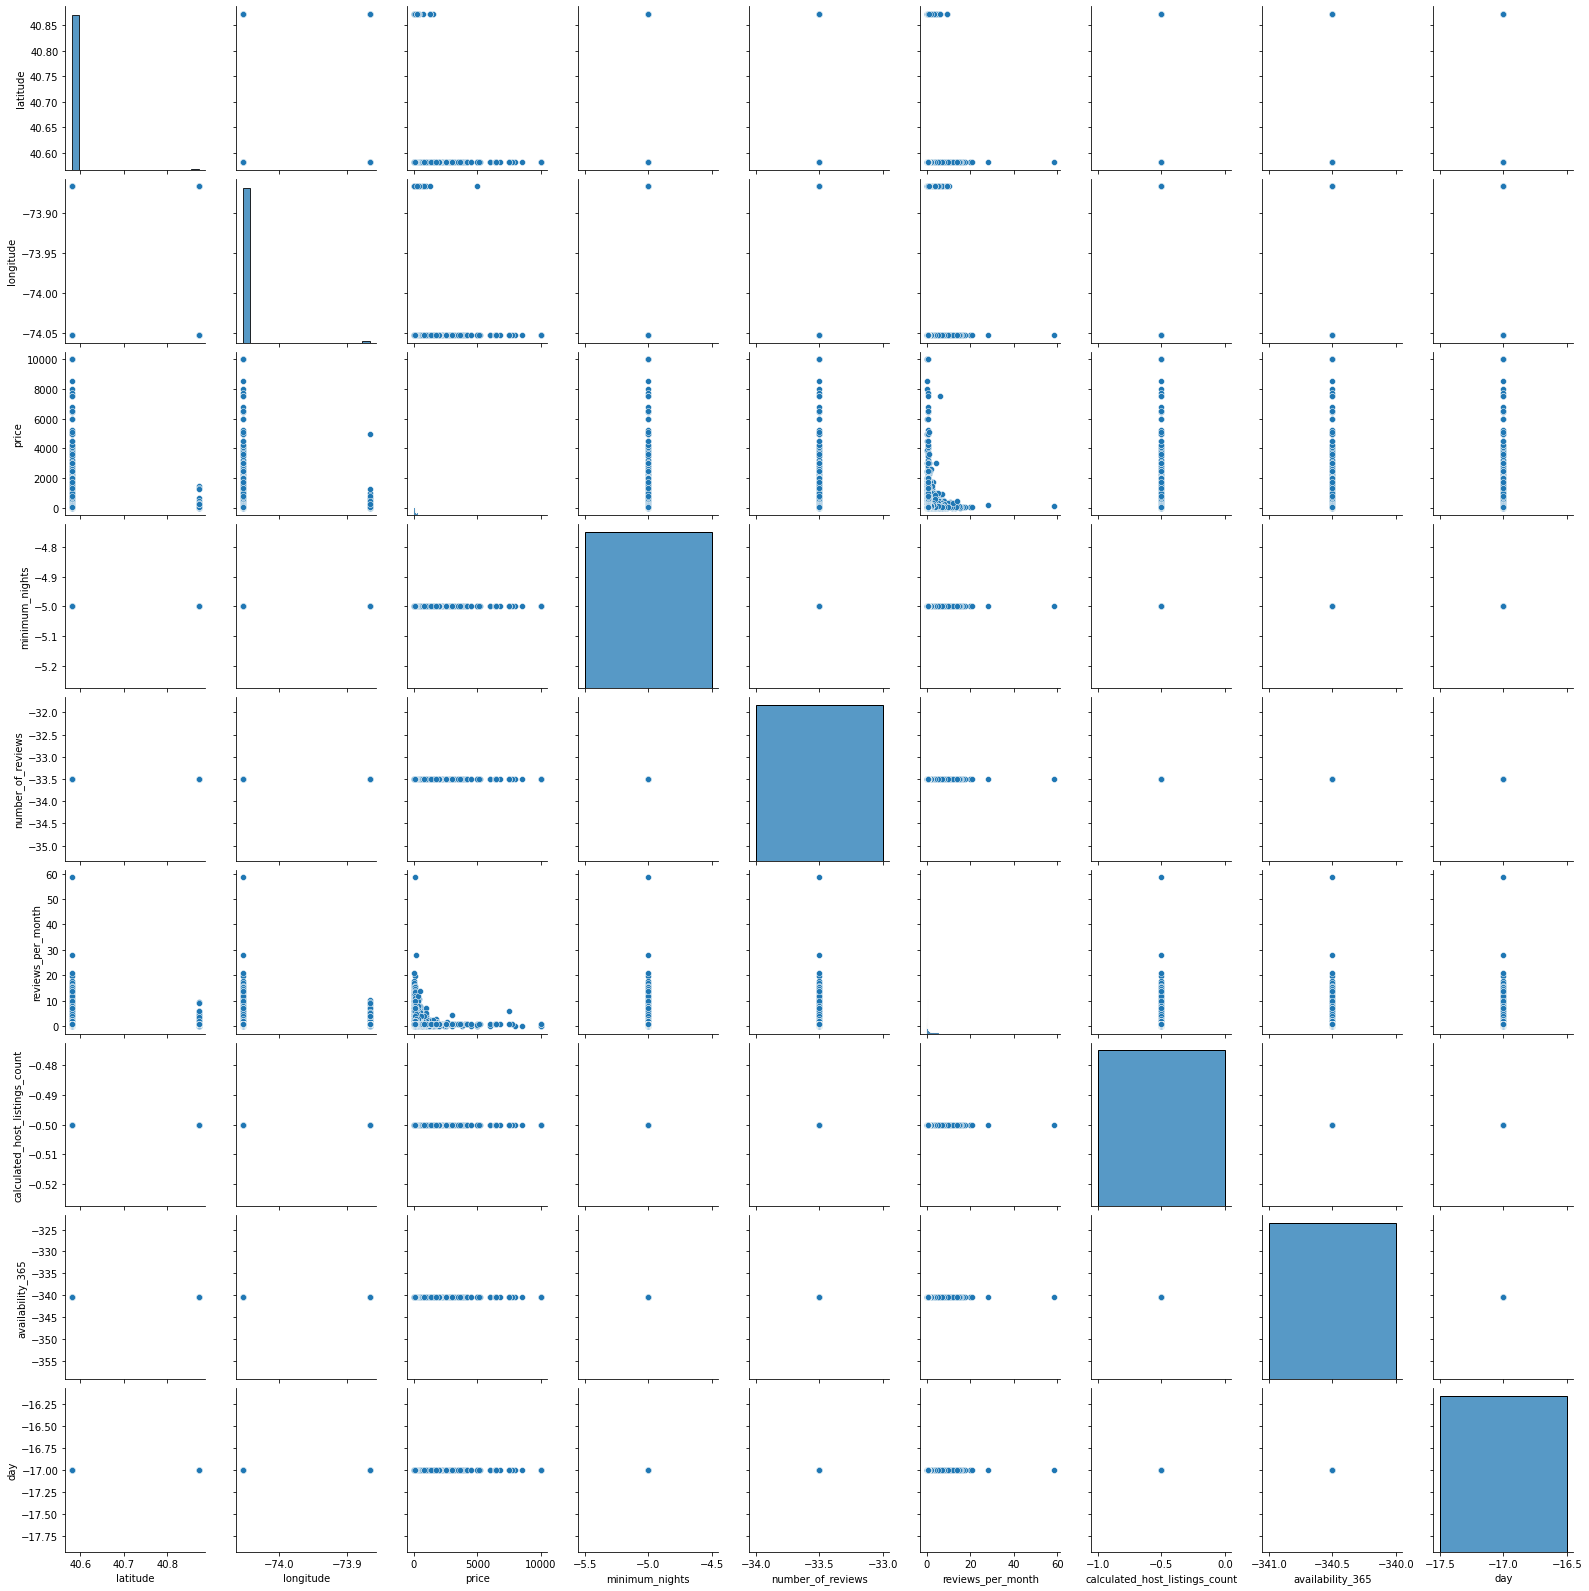

In [120]:
sns.pairplot(df1[continuous])

In [121]:
df1.shape

(48895, 15)

In [122]:
df2=df.copy()

In [123]:
def normal_dis(d,var,dist):
    upper_bound=d[var].mean()+dist*d[var].std()
    lower_bound=d[var].mean()-dist*d[var].std()
    return upper_bound,lower_bound

In [124]:
lat_upper,lat_lower=normal_dis(df2,'latitude',3)
lat_upper,lat_lower

(40.89253911483476, 40.56535864649052)

In [125]:
lon_upper,lon_lower=normal_dis(df2,'longitude',3)
lon_upper,lon_lower

(-73.81369940636542, -74.09063982300366)

In [126]:
min_nig_upper,min_nig_lower=normal_dis(df2,'minimum_nights',3)
min_nig_upper,min_nig_lower

(68.56161076336004, -54.50168643571918)

In [127]:
no_rev_upper,no_rev_lower=normal_dis(df2,'number_of_reviews',3)
no_rev_upper,no_rev_lower

(156.92621249184032, -110.37728110826328)

In [128]:
rev_permon_upper,re_permon_lower=normal_dis(df2,'reviews_per_month',3)
rev_permon_upper,re_permon_lower

(5.801513562289693, -3.323653658414041)

In [129]:
cal_host_upper,cal_host_lower=normal_dis(df2,'calculated_host_listings_count',3)
cal_host_upper,cal_host_lower

(106.00153855050951, -91.71357454601008)

In [130]:
avail_upper,avail_lower=normal_dis(df2,'availability_365',3)
avail_upper,avail_lower

(507.6481938892276, -282.08553922106114)

In [131]:
year_upper,year_lower=normal_dis(df2,'day',3)
year_upper,year_lower

(41.501082683095966, -8.848173387666982)

In [132]:
df2['latitude']=np.where(df2['latitude']>lat_upper,lat_upper,np.where(df2['latitude']<lat_lower,lat_lower,df2['latitude']))
df2['longitude']=np.where(df2['longitude']>lon_upper,lon_upper,np.where(df2['longitude']<lon_lower,lon_lower,df2['longitude']))
df2['minimum_nights']=np.where(df2['minimum_nights']>min_nig_upper,min_nig_upper,np.where(df2['minimum_nights']<min_nig_lower,min_nig_lower,df2['minimum_nights']))
df2['number_of_reviews']=np.where(df2['number_of_reviews']>no_rev_upper,no_rev_upper,np.where(df2['number_of_reviews']<no_rev_lower,no_rev_lower,df2['number_of_reviews']))
df2['calculated_host_listings_count']=np.where(df2['calculated_host_listings_count']>cal_host_upper,cal_host_upper,np.where(df2['calculated_host_listings_count']<cal_host_lower,cal_host_lower,df2['calculated_host_listings_count']))
df2['availability_365']=np.where(df2['availability_365']>avail_upper,avail_upper,np.where(df2['availability_365']<avail_lower,avail_lower,df2['availability_365']))
df2['day']=np.where(df2['day']>year_upper,year_upper,np.where(df2['day']<year_lower,year_lower,df2['day']))
                                

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


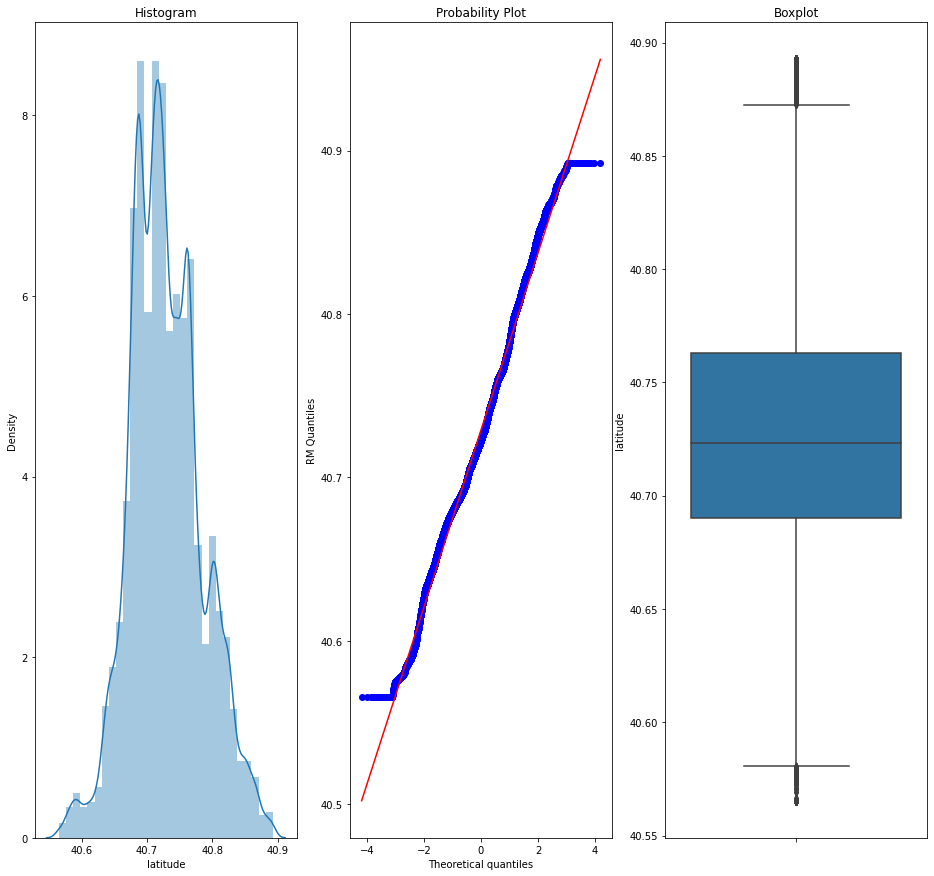

In [133]:
dig_plot(df2,'latitude')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


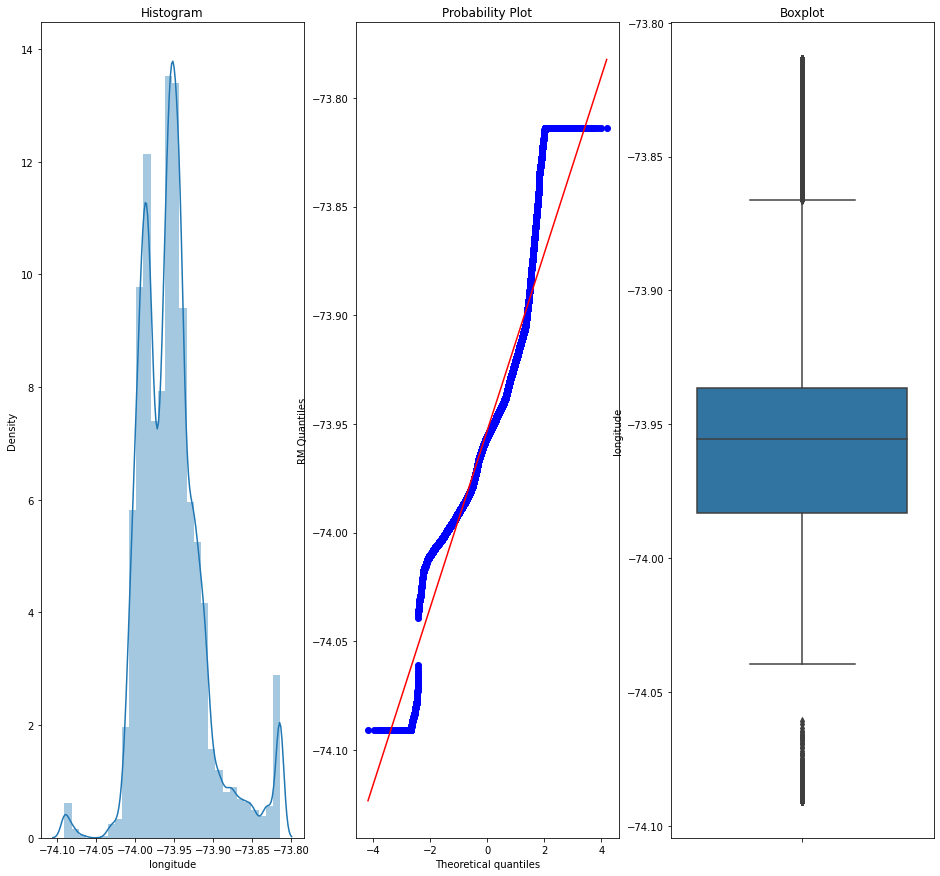

In [134]:
dig_plot(df2,'longitude')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


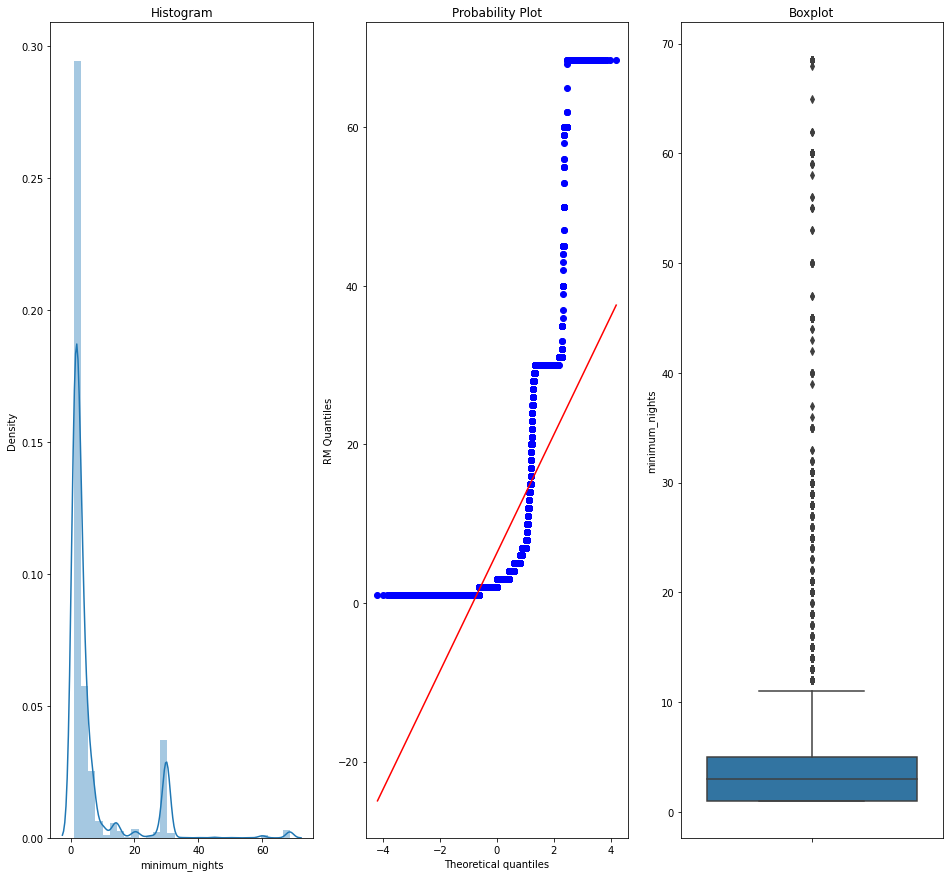

In [135]:
dig_plot(df2,'minimum_nights')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


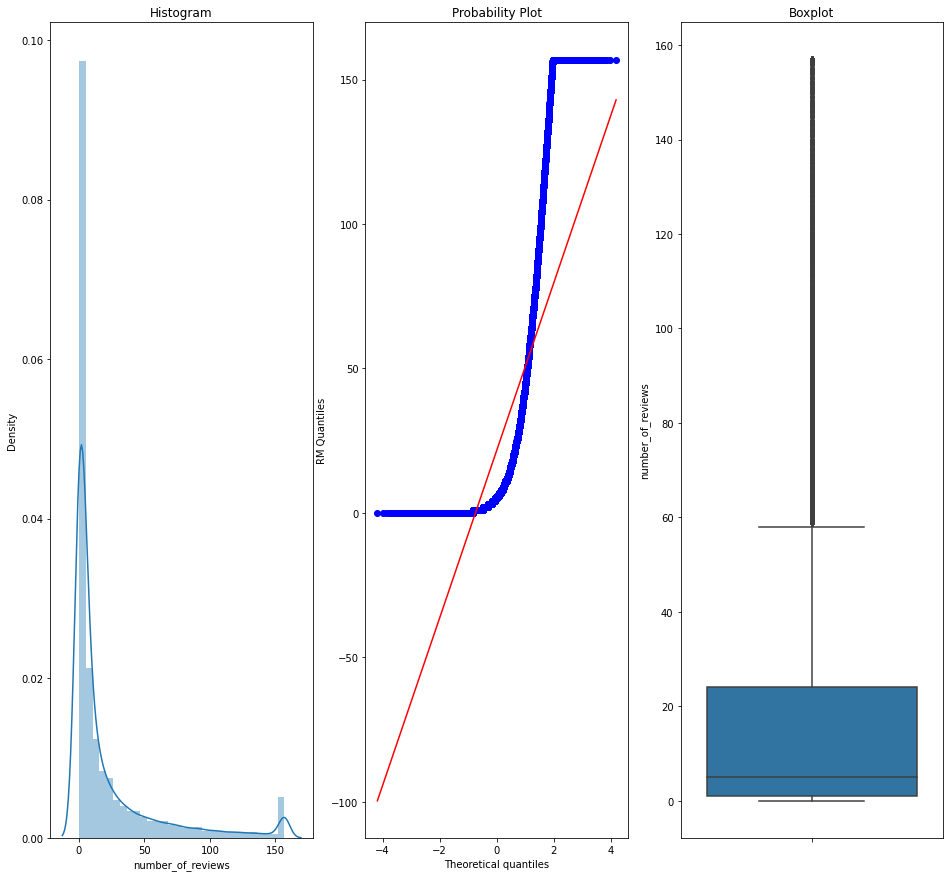

In [136]:
dig_plot(df2,'number_of_reviews')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


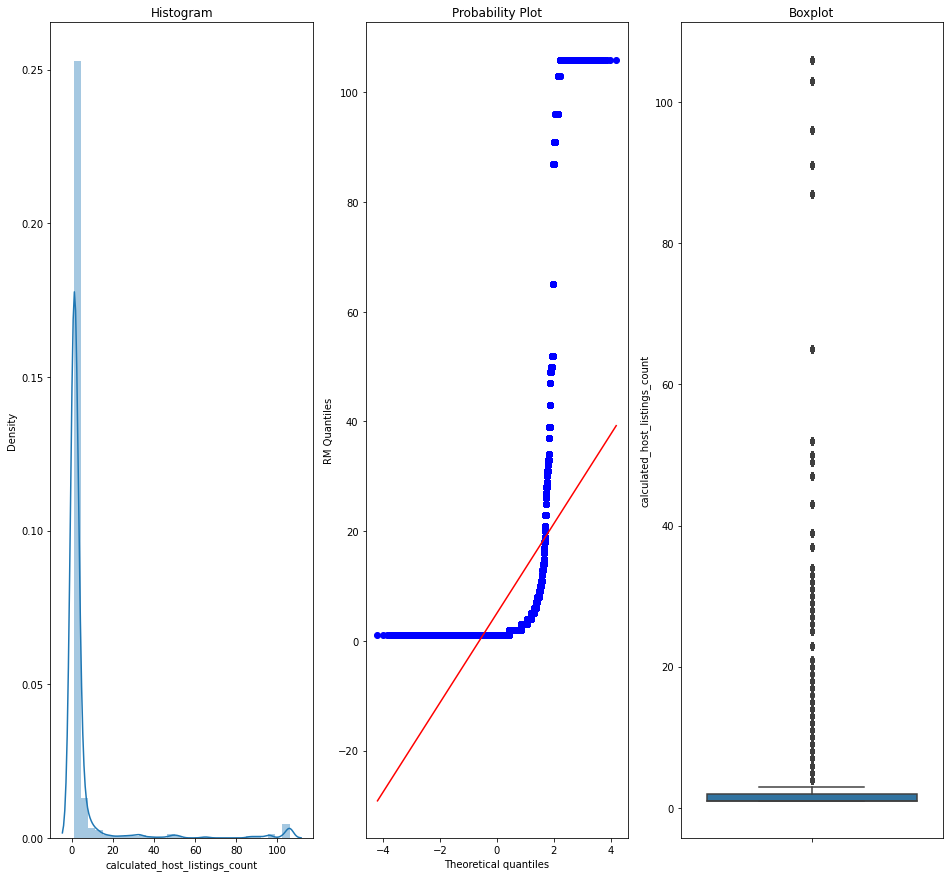

In [137]:
dig_plot(df2,'calculated_host_listings_count')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


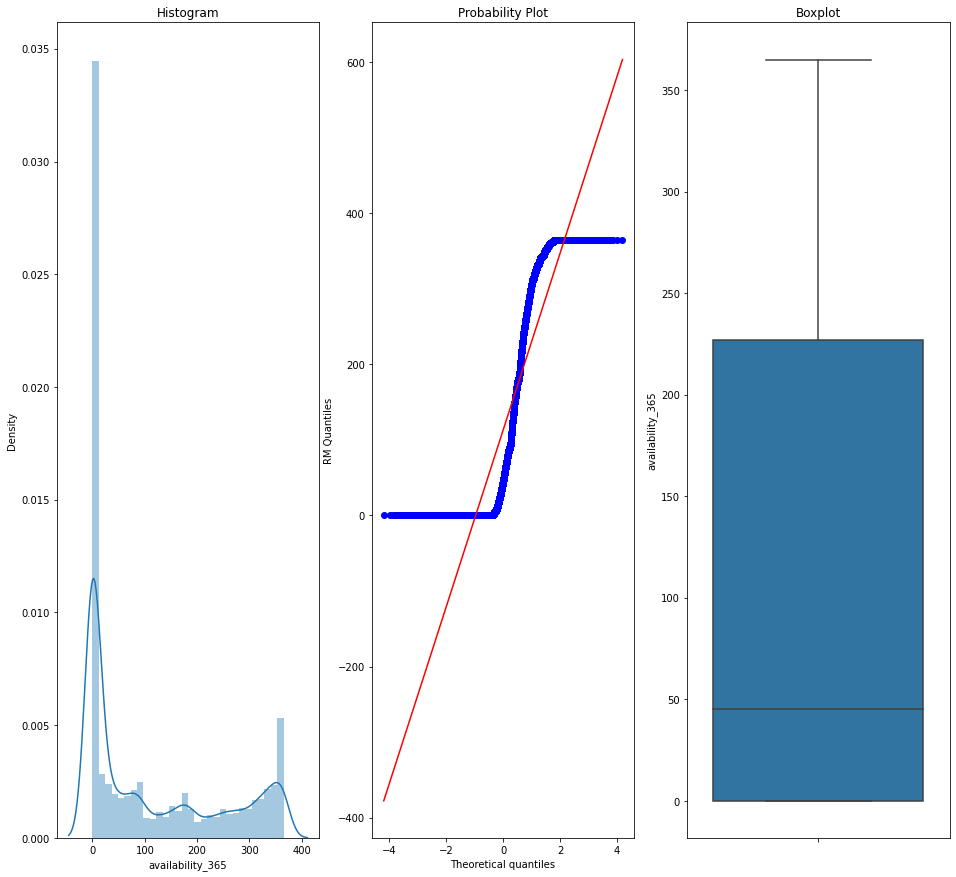

In [138]:
dig_plot(df2,'availability_365')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


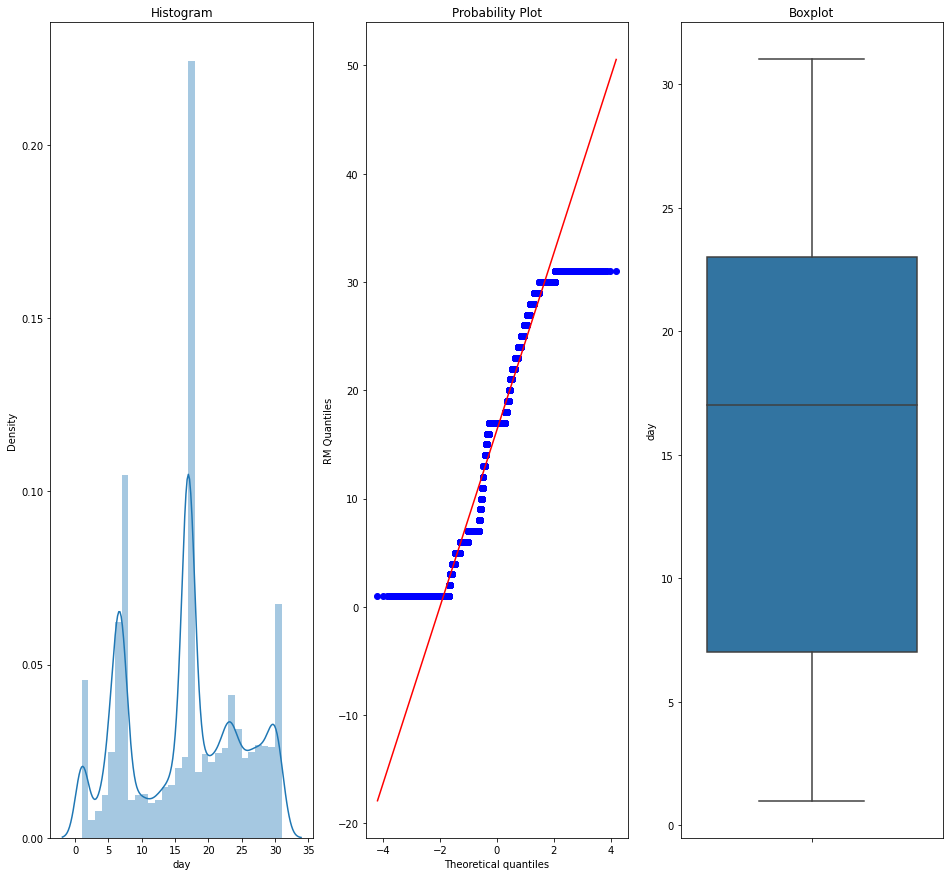

In [139]:
dig_plot(df2,'day')

In [140]:
df2.corr()

latitude  longitude     price  minimum_nights  \
latitude                        1.000000   0.095187  0.034081        0.042922   
longitude                       0.095187   1.000000 -0.159354       -0.101560   
price                           0.034081  -0.159354  1.000000        0.056076   
minimum_nights                  0.042922  -0.101560  0.056076        1.000000   
number_of_reviews              -0.019712   0.059655 -0.051080       -0.151701   
reviews_per_month              -0.014119   0.135532 -0.036814       -0.188729   
calculated_host_listings_count  0.042234  -0.111137  0.054564        0.377233   
availability_365               -0.010845   0.081493  0.081829        0.226293   
year                           -0.009988   0.078306  0.010729        0.010373   
month                          -0.001216  -0.009939  0.002384        0.013701   
day                             0.001083  -0.013379 -0.001297        0.011202   
week_day                       -0.003309   0.016013 -0.004629       -0.012656   

                                number_of_reviews  reviews_per_month  \
latitude                                -0.019712          -0.014119   
longitude                                0.059655           0.135532   
price                                   -0.051080          -0.036814   
minimum_nights                          -0.151701          -0.188729   
number_of_reviews                        1.000000           0.576656   
reviews_per_month                        0.576656           1.000000   
calculated_host_listings_count          -0.098880          -0.054530   
availability_365                         0.184753           0.165954   
year                                     0.201724           0.356997   
month                                   -0.060837          -0.102948   
day                                      0.031059           0.002130   
week_day                                 0.041791           0.059062   

                                calculated_host_listings_count  \
latitude                                              0.042234   
longitude                                            -0.111137   
price                                                 0.054564   
minimum_nights                                        0.377233   
number_of_reviews                                    -0.098880   
reviews_per_month                                    -0.054530   
calculated_host_listings_count                        1.000000   
availability_365                                      0.285986   
year                                                  0.071598   
month                                                 0.003102   
day                                                   0.013161   
week_day                                             -0.002209   

                                availability_365      year     month  \
latitude                               -0.010845 -0.009988 -0.001216   
longitude                               0.081493  0.078306 -0.009939   
price                                   0.081829  0.010729  0.002384   
minimum_nights                          0.226293  0.010373  0.013701   
number_of_reviews                       0.184753  0.201724 -0.060837   
reviews_per_month                       0.165954  0.356997 -0.102948   
calculated_host_listings_count          0.285986  0.071598  0.003102   
availability_365                        1.000000  0.256517 -0.047805   
year                                    0.256517  1.000000 -0.228896   
month                                  -0.047805 -0.228896  1.000000   
day                                     0.010170 -0.008705  0.212735   
week_day                                0.032877  0.039239  0.121628   

                                     day  week_day  
latitude                        0.001083 -0.003309  
longitude                      -0.013379  0.016013  
price                          -0.001297 -0.004629  
minimum_nights                  0

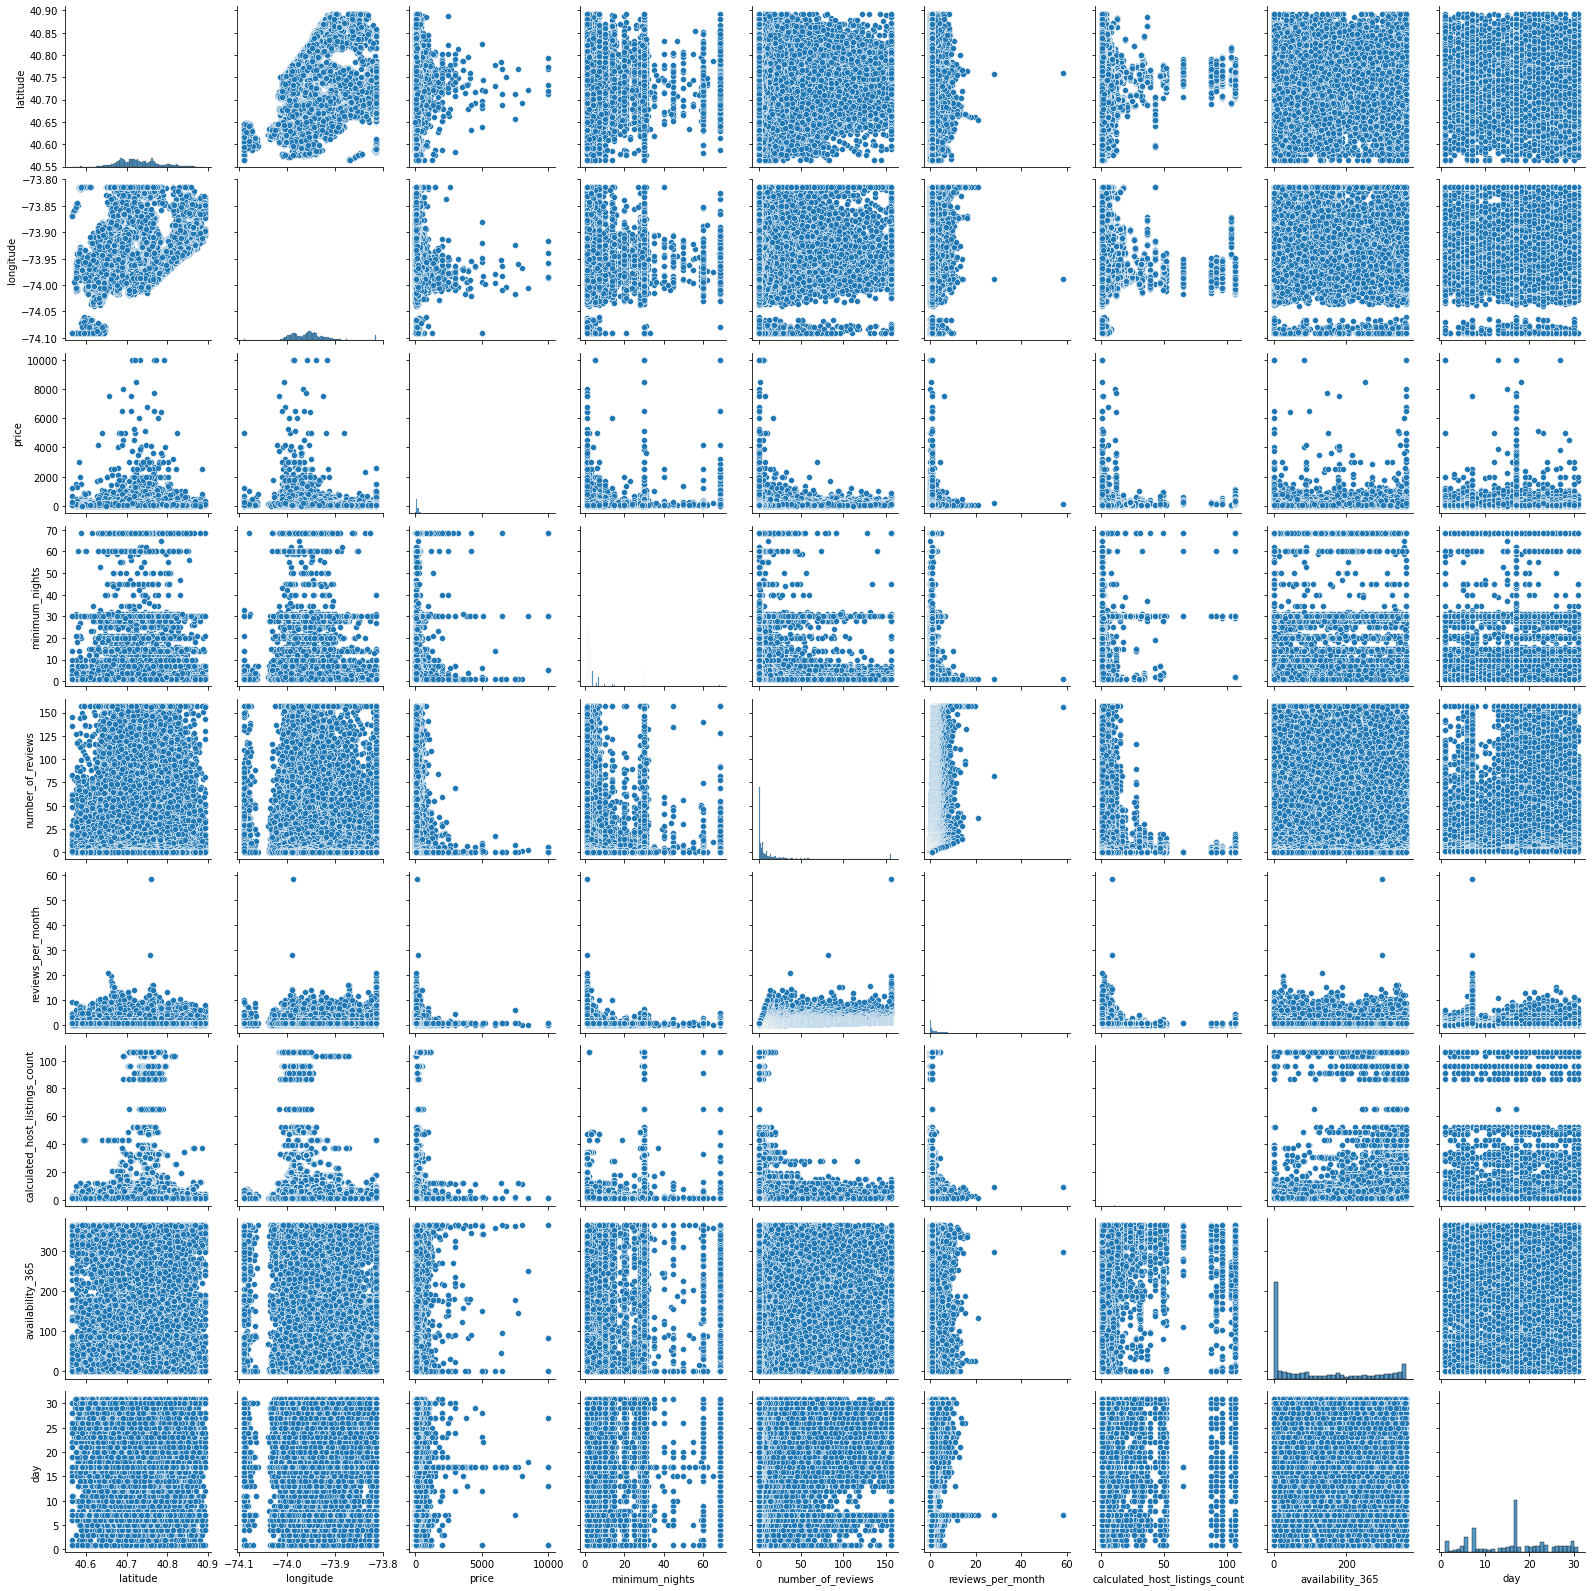

In [141]:
sns.pairplot(df2[continuous])

In [142]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

latitude                            0.073015
longitude                           0.046795
price                             106.000000
minimum_nights                      4.000000
number_of_reviews                  23.000000
reviews_per_month                   1.300000
calculated_host_listings_count      1.000000
availability_365                  227.000000
year                                1.000000
month                               1.000000
day                                16.000000
week_day                            3.000000
dtype: float64


In [143]:
df3=df.copy

In [144]:
df3= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q1 + 1.5 * IQR))).any(axis=1)]
print(df3.shape)

(7823, 15)


C:\Users\899164\AppData\Local\Temp\3\ipykernel_19792\3919138846.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df3= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q1 + 1.5 * IQR))).any(axis=1)]


In [145]:
df3.head(5)

neighbourhood_group    neighbourhood  latitude  longitude        room_type  \
19           Manhattan      East Harlem  40.79685  -73.94872  Entire home/apt   
25            Brooklyn  Windsor Terrace  40.65599  -73.97519     Private room   
56           Manhattan  Lower East Side  40.72004  -73.99104     Private room   
83            Brooklyn         Flatbush  40.65401  -73.96323  Entire home/apt   
90            Brooklyn         Bushwick  40.70032  -73.93830     Private room   

    price  minimum_nights  number_of_reviews  reviews_per_month  \
19    190               7                  0               0.72   
25     60               1                 19               1.37   
56    110               5                 19               0.17   
83    130               6                 16               0.15   
90     65               4                 24               0.28   

    calculated_host_listings_count  availability_365    year  month   day  \
19                               2               249  2019.0    6.0  17.0   
25                               2                85  2019.0    6.0  23.0   
56                               1               301  2019.0    5.0  18.0   
83                               1                38  2019.0    6.0  15.0   
90                               1               317  2019.0    5.0  26.0   

    week_day  
19       3.0  
25       6.0  
56       5.0  
83       5.0  
90       6.0

In [146]:
df3.corr()

latitude  longitude     price  minimum_nights  \
latitude                        1.000000  -0.034353  0.272392        0.000502   
longitude                      -0.034353   1.000000 -0.337969       -0.016180   
price                           0.272392  -0.337969  1.000000        0.018118   
minimum_nights                  0.000502  -0.016180  0.018118        1.000000   
number_of_reviews              -0.008731  -0.010525  0.036656        0.019019   
reviews_per_month               0.006625   0.013436  0.032927       -0.090986   
calculated_host_listings_count -0.054594   0.052308 -0.107022       -0.029215   
availability_365               -0.059441   0.044078  0.059976        0.027976   
year                           -0.003727   0.007494  0.043852        0.002754   
month                           0.017155   0.006708  0.003771       -0.071147   
day                            -0.004056   0.001667  0.008037       -0.007370   
week_day                        0.019442  -0.029744  0.013682       -0.022931   

                                number_of_reviews  reviews_per_month  \
latitude                                -0.008731           0.006625   
longitude                               -0.010525           0.013436   
price                                    0.036656           0.032927   
minimum_nights                           0.019019          -0.090986   
number_of_reviews                        1.000000           0.259721   
reviews_per_month                        0.259721           1.000000   
calculated_host_listings_count           0.097907           0.049959   
availability_365                         0.240050           0.180606   
year                                    -0.073660           0.442030   
month                                   -0.245622           0.253515   
day                                      0.168626           0.157014   
week_day                                 0.083133           0.087091   

                                calculated_host_listings_count  \
latitude                                             -0.054594   
longitude                                             0.052308   
price                                                -0.107022   
minimum_nights                                       -0.029215   
number_of_reviews                                     0.097907   
reviews_per_month                                     0.049959   
calculated_host_listings_count                        1.000000   
availability_365                                      0.156175   
year                                                  0.025799   
month                                                -0.042747   
day                                                   0.026148   
week_day                                              0.034645   

                                availability_365      year     month  \
latitude                               -0.059441 -0.003727  0.017155   
longitude                               0.044078  0.007494  0.006708   
price                                   0.059976  0.043852  0.003771   
minimum_nights                          0.027976  0.002754 -0.071147   
number_of_reviews                       0.240050 -0.073660 -0.245622   
reviews_per_month                       0.180606  0.442030  0.253515   
calculated_host_listings_count          0.156175  0.025799 -0.042747   
availability_365                        1.000000  0.124545 -0.037628   
year                                    0.124545  1.000000  0.345926   
month                                  -0.037628  0.345926  1.000000   
day                                     0.096172  0.070250  0.028865   
week_day                                0.043287  0.006997  0.019193   

                                     day  week_day  
latitude                       -0.004056  0.019442  
longitude                       0.001667 -0.029744  
price                           0.008037  0.013682  
minimum_nights                 -0

In [147]:
df3.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
year                              0
month                             0
day                               0
week_day                          0
dtype: int64

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


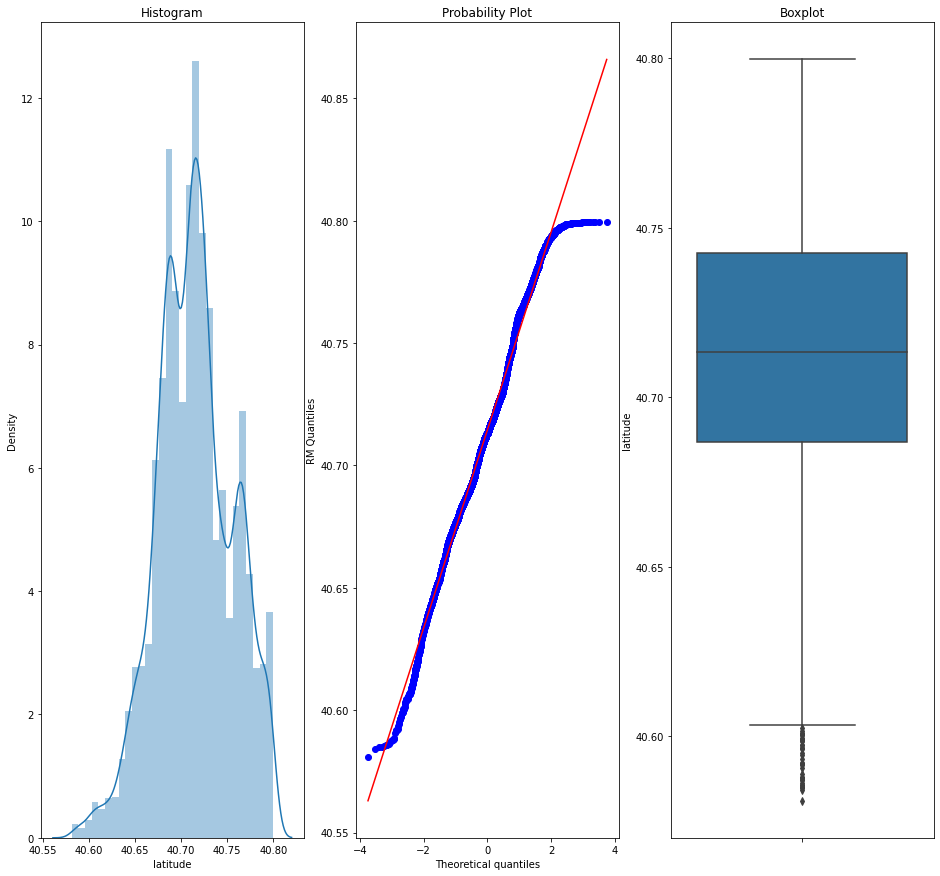

In [148]:
dig_plot(df3,'latitude')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


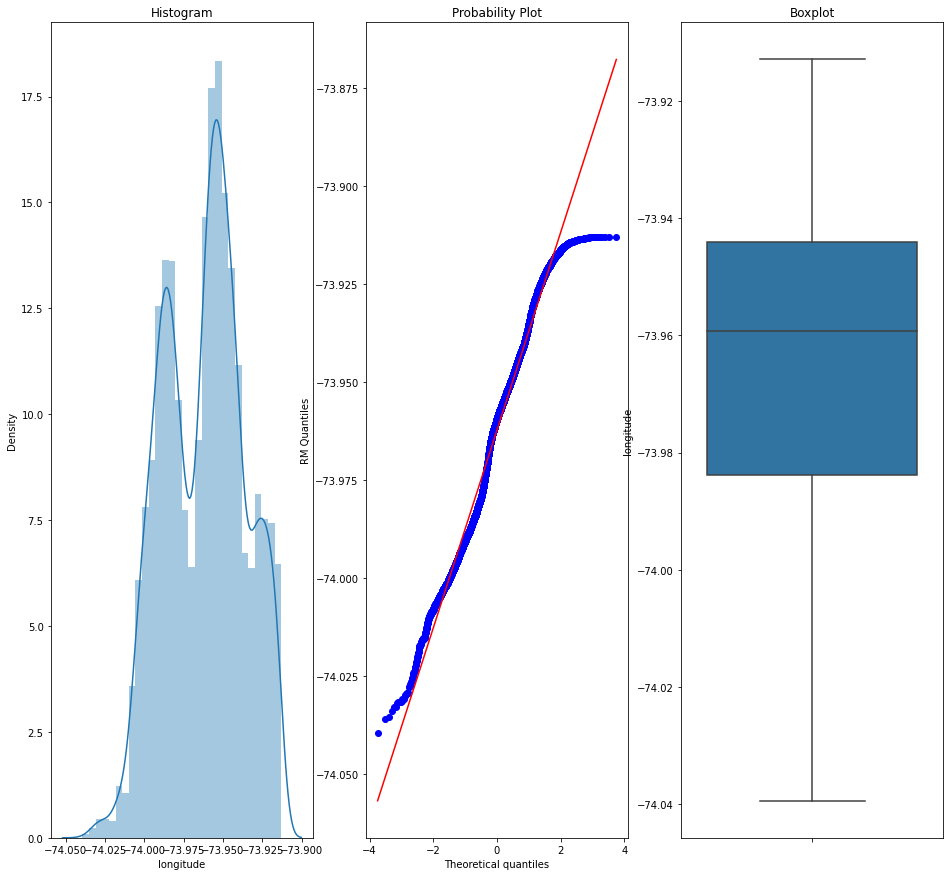

In [149]:
dig_plot(df3,'longitude')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


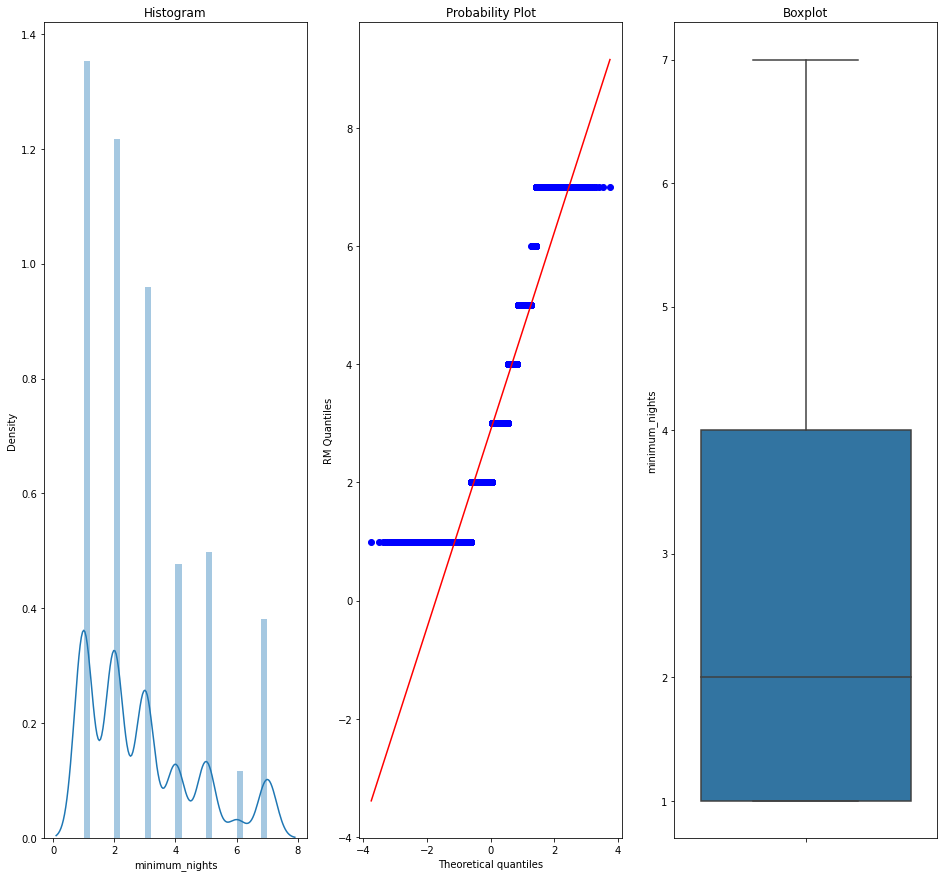

In [150]:
dig_plot(df3,'minimum_nights')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


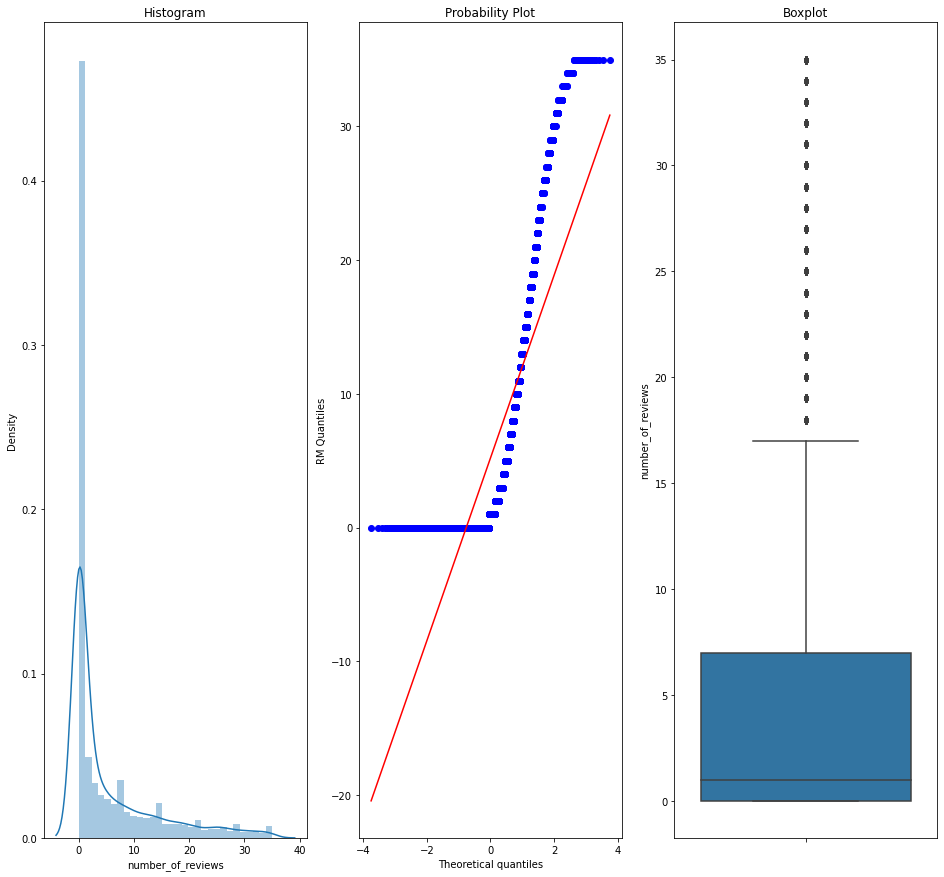

In [151]:
dig_plot(df3,'number_of_reviews')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


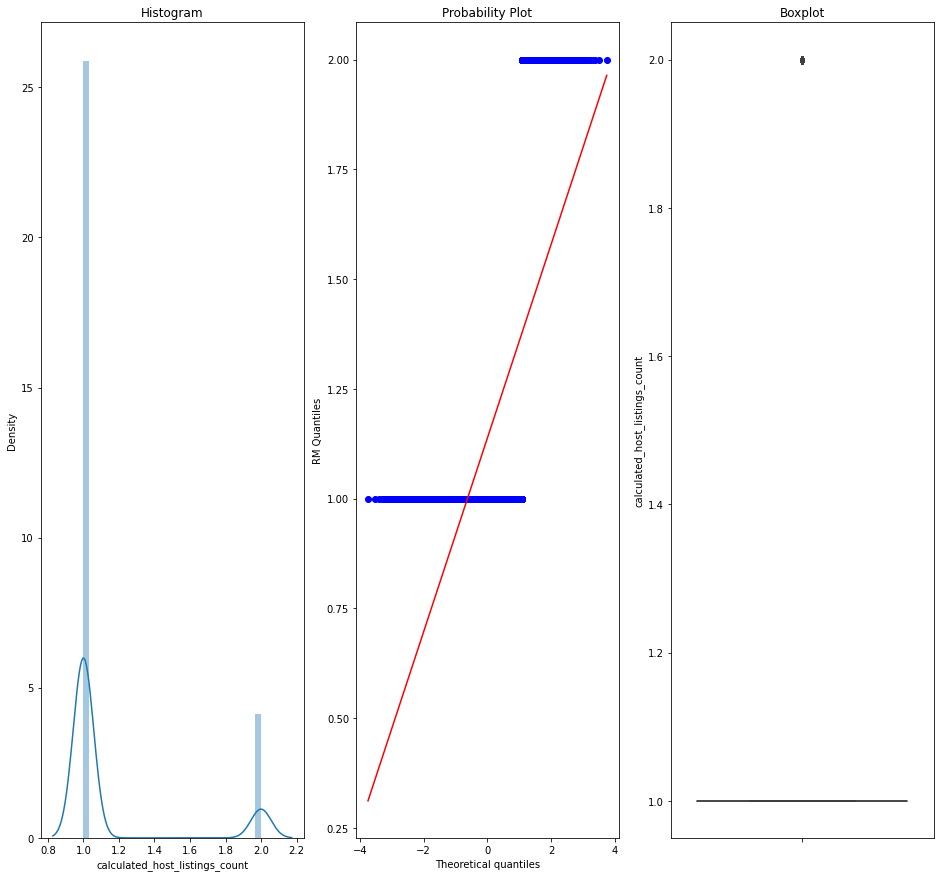

In [152]:
dig_plot(df3,'calculated_host_listings_count')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


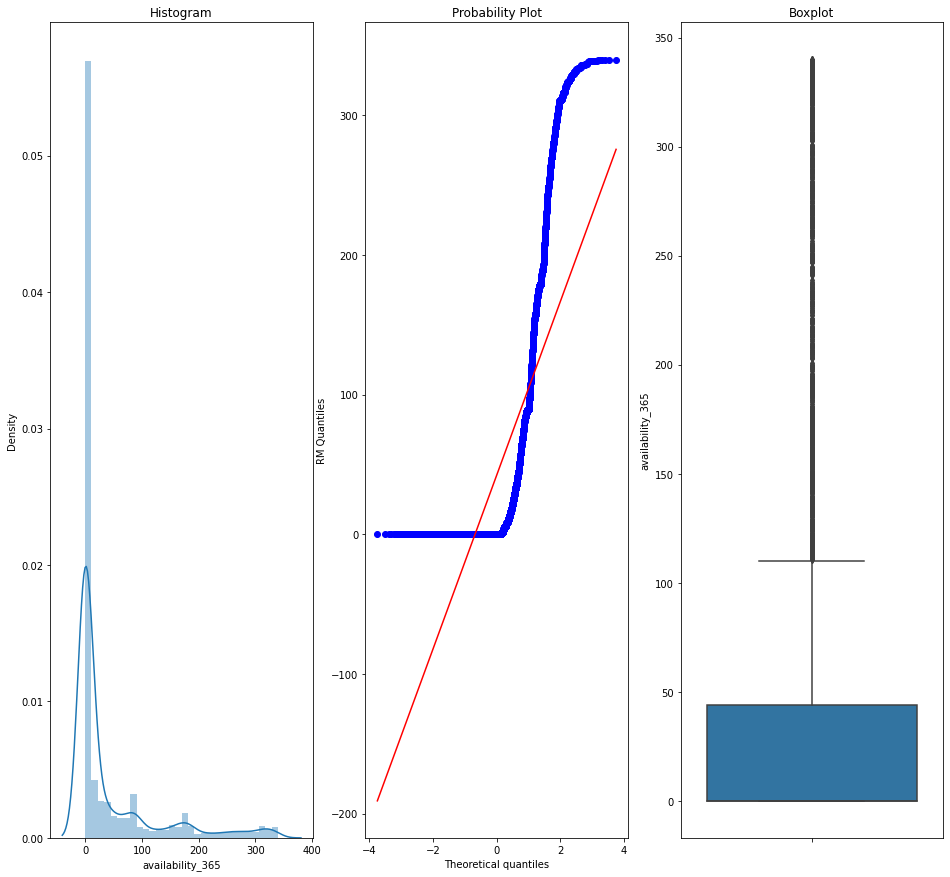

In [153]:
dig_plot(df3,'availability_365')

c:\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


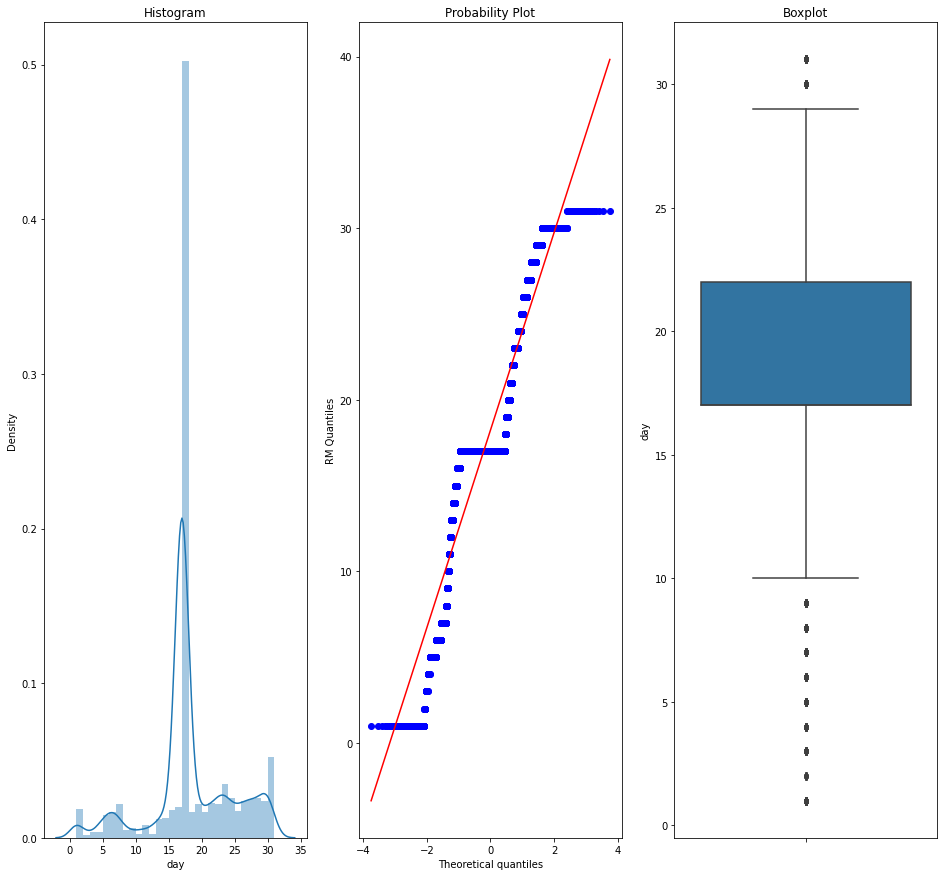

In [154]:
dig_plot(df3,'day')

In [155]:
df3.describe()

latitude    longitude        price  minimum_nights  \
count  7823.000000  7823.000000  7823.000000     7823.000000   
mean     40.714465   -73.962230   114.929950        2.884699   
std       0.040566     0.025435    51.958453        1.798889   
min      40.581010   -74.039420     0.000000        1.000000   
25%      40.686830   -73.983885    70.000000        1.000000   
50%      40.713340   -73.959300   103.000000        2.000000   
75%      40.742575   -73.944120   150.000000        4.000000   
max      40.799620   -73.912880   228.000000        7.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count        7823.000000        7823.000000                     7823.000000   
mean            5.208488           0.742597                        1.137799   
std             8.220956           0.420913                        0.344711   
min             0.000000           0.030000                        1.000000   
25%             0.000000           0.590000                        1.000000   
50%             1.000000           0.720000                        1.000000   
75%             7.000000           0.720000                        1.000000   
max            35.000000           2.230000                        2.000000   

       availability_365         year        month          day     week_day  
count       7823.000000  7823.000000  7823.000000  7823.000000  7823.000000  
mean          42.471686  2018.817845     5.626103    18.229835     3.219098  
std           80.274795     0.508359     0.667520     6.159152     1.625138  
min            0.000000  2017.000000     4.000000     1.000000     0.000000  
25%            0.000000  2019.000000     5.000000    17.000000     3.000000  
50%            0.000000  2019.000000     6.000000    17.000000     3.000000  
75%           44.000000  2019.000000     6.000000    22.000000     4.000000  
max          340.000000  2019.000000     6.000000    31.000000     6.000000

In [156]:
df3.corr()

latitude  longitude     price  minimum_nights  \
latitude                        1.000000  -0.034353  0.272392        0.000502   
longitude                      -0.034353   1.000000 -0.337969       -0.016180   
price                           0.272392  -0.337969  1.000000        0.018118   
minimum_nights                  0.000502  -0.016180  0.018118        1.000000   
number_of_reviews              -0.008731  -0.010525  0.036656        0.019019   
reviews_per_month               0.006625   0.013436  0.032927       -0.090986   
calculated_host_listings_count -0.054594   0.052308 -0.107022       -0.029215   
availability_365               -0.059441   0.044078  0.059976        0.027976   
year                           -0.003727   0.007494  0.043852        0.002754   
month                           0.017155   0.006708  0.003771       -0.071147   
day                            -0.004056   0.001667  0.008037       -0.007370   
week_day                        0.019442  -0.029744  0.013682       -0.022931   

                                number_of_reviews  reviews_per_month  \
latitude                                -0.008731           0.006625   
longitude                               -0.010525           0.013436   
price                                    0.036656           0.032927   
minimum_nights                           0.019019          -0.090986   
number_of_reviews                        1.000000           0.259721   
reviews_per_month                        0.259721           1.000000   
calculated_host_listings_count           0.097907           0.049959   
availability_365                         0.240050           0.180606   
year                                    -0.073660           0.442030   
month                                   -0.245622           0.253515   
day                                      0.168626           0.157014   
week_day                                 0.083133           0.087091   

                                calculated_host_listings_count  \
latitude                                             -0.054594   
longitude                                             0.052308   
price                                                -0.107022   
minimum_nights                                       -0.029215   
number_of_reviews                                     0.097907   
reviews_per_month                                     0.049959   
calculated_host_listings_count                        1.000000   
availability_365                                      0.156175   
year                                                  0.025799   
month                                                -0.042747   
day                                                   0.026148   
week_day                                              0.034645   

                                availability_365      year     month  \
latitude                               -0.059441 -0.003727  0.017155   
longitude                               0.044078  0.007494  0.006708   
price                                   0.059976  0.043852  0.003771   
minimum_nights                          0.027976  0.002754 -0.071147   
number_of_reviews                       0.240050 -0.073660 -0.245622   
reviews_per_month                       0.180606  0.442030  0.253515   
calculated_host_listings_count          0.156175  0.025799 -0.042747   
availability_365                        1.000000  0.124545 -0.037628   
year                                    0.124545  1.000000  0.345926   
month                                  -0.037628  0.345926  1.000000   
day                                     0.096172  0.070250  0.028865   
week_day                                0.043287  0.006997  0.019193   

                                     day  week_day  
latitude                       -0.004056  0.019442  
longitude                       0.001667 -0.029744  
price                           0.008037  0.013682  
minimum_nights                 -0

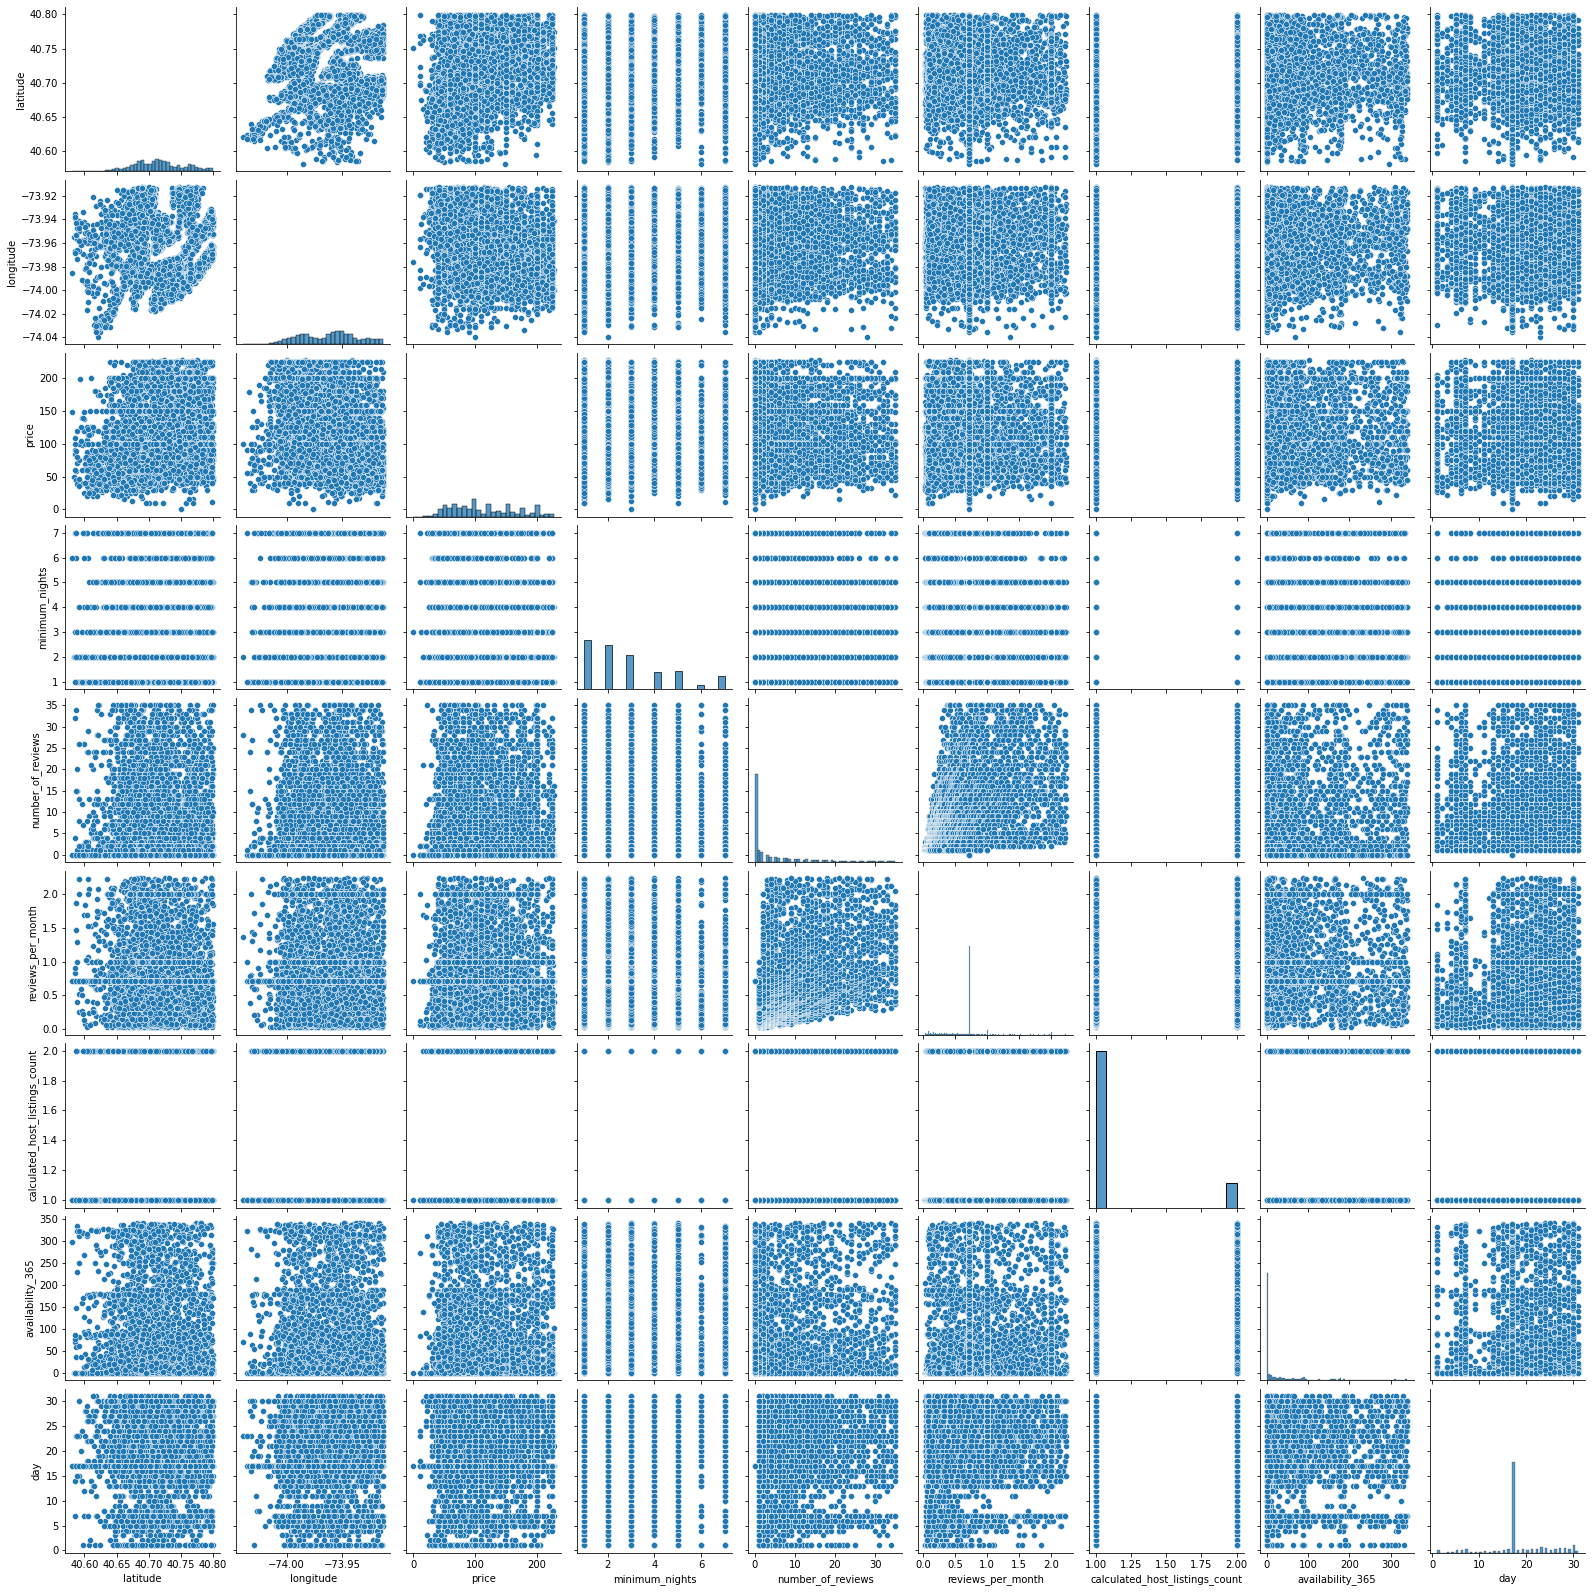

In [157]:
sns.pairplot(df3[continuous])